# COGS 108 - Behaviors Related to Frequent Alcohol Consumption

# Overview 
Our group is interested in studying the behaviors of high school students that may be related to frequent alcohol consumption. We analyzed 201,991 responses from the YRBSS dataset by CDC, examining several health-risk behaviors and factors such as substance use and mental health/psychological factors. This project relies on two methods for analysis: the first being a general overview by computing Spearman's rank correlation coefficients and the second being a deeper analysis using Poisson regression models. Overall, we are bemused by our results, finding that not only are there a ton of spurious correlations but also the fact that time is a factor as well - students tend to drink less frequently over time.

# Names

- Allen Zou
- Brian Han
- Dillen Padhiar
- Lian Su

# Research Question

What is the relationship between frequent alcohol use by high school students in the United States and certain health-risk behaviors and factors such as substance use (methamphetamines, marijuana, steroids, cigarettes, tobacco, etc.), mental health/psychological factors (feeling unsafe at school, feeling hopeless, contemplating suicide, arming weapons, and engaging in fights), etc.?

## Background & Prior Work

Alcohol consumption is a topic of concern that has raised many interests and questions because of its known negative consequences. Much research has already been conducted to examine the reasons for large alcohol intake and learn the effects of such intake, but we noticed that they tend to be conducted on the general population, usually in the scope of an entire country like the United States or the world itself. We are interested in exploring the effects of alcohol consumption as well as any relationships with any potential factors in the individuals of the population, but we want don't want to focus on a broad range of people as previously mentioned. Thus, for the purpose of our project, we will examine a smaller category of people.

The population of students will be our area of focus. From what we found, however, most research on students has been done on college students, and the first 3 references we included below elucidates some findings. For example, college students tend to drink only slightly more than people who don’t attend college when trait-based risk is low, but this is exacerbated when trait-based risk is high [1]. Additionally, social norms tend to be an important factor in college drinking; college students tend to have more alcohol-related problems than those who don’t attend college, having an early Friday class correlates with more drinking before that day (strangely does not correlate with no Friday classes or late Friday classes), and etc. [2] The third reference describes some roadblocks encountered with research about college alcohol consumption; given that a college campus environment has a constantly changing social scene and culture, this confounds the factors that this group tried to consider, making it difficult to identify and establish fixed variables in research. Their situation is further convoluted by the fact that individual factors can play a role in alcohol consumption, which often aren’t related to the environmental factors in the first place [3]. This is just a small snippet of the total amount of research conducted, but for the sake of length, we’ll cut it short here.

Interestingly, there is a large difference between the amount of research done on college students and on high school students, which may be due to the limited number of datasets that exist on high school students due to age restrictions and district policies. Out of the little research we found, it seems like most project conclusions for high school student alcohol consumption tend to focus on their academic performance. For example, reference 4 found that the level of alcohol consumption (scale of 1 to 5) negatively correlates with school performance (measured on a scale of 1 - 20), but there seems to be no correlation between level of alcohol consumption and study hours [4]. We found another research attempt on the relation between alcohol consumption and academic performance (reference 5), but the conclusions aren’t clear. Nevertheless, the main takeaway from reference 5 is that like in reference 4, the level of alcohol consumption does negatively correlate with school performance, particularly in terms of grades in that study (same scale of 1 - 20) [5]. There are a few attempts at determining what factors correlate with high school student alcohol consumption (reference 6 for example); however, the majority of these projects approach this from a pure statistical and machine learning perspective. Finally, there exists a dataset in reference [6] about high school students, which would have been a great dataset to use if it didn't have a few issues: it's conducted in Portugual and has been heavily used for reserach already. For example, the study in reference [6] found that students tend to drink more on weekends, parental cohabitation status doesn't have any noticeable correlation with alcohol consumption, etc. [7] 
Thus, we think the best way to contribute to this field of study is to use an approach that focuses on data analysis and visualization instead machine learning as well as perform a study on a dataset that actually focuses on the United States and provides deep insight into behaviors of students who enage in alcohol consumption.

References:
- 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3125885/
- 2) https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1530-0277.2007.00402.x
- 3) https://www.collegedrinkingprevention.gov/media/journal/040_090.pdf
- 4) https://www.rpubs.com/heke0495/419722
- 5) https://www.kaggle.com/kanncaa1/does-alcohol-affect-success
- 6) https://www.kaggle.com/uciml/student-alcohol-consumption
- 7) https://www.kaggle.com/jhuno137/machine-learning-on-student-alcohol-consumption

# Hypothesis

We hypothesize that all these health-risk behaviors and factors will exhibit some sort of positive correlation with frequent alcohol consumption; however, we think that psychological factors (including the need to arm themselves with weapons and engage in fights) such as feeling unsafe at school, hopeless, and suicidal will have the strongest relationship to frequent alcohol consumption. We also hypothesize that high school students who use less consequential substances such as cigarettes, tobacco, marijuana, chemicals (sniffing spray paint cans, glue, markers, etc.), and steroids will tend to drink more alcohol than those who use the more dangerous substances.

# Dataset(s)

- Dataset Name: YRBSS Data & Documentation
- Link to the dataset: https://www.cdc.gov/healthyyouth/data/yrbs/data.htm
- Number of observations: 201,991 observations

The YRBSS Data & Documentation datasets contain responses national surveys that are administrated on odd years starting from 1991, particularly high school students in the United States. They contain questions that primarily focus on health-related issues and health-risk behaviors of high school students. 

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from patsy import dmatrices
import statsmodels.api as sm

# Uncomment this if you're working on Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

# Data Cleaning

There 201,991 observations are split among many years. We first need to convert these datasets from mdb to xlsx to csv files outside of Jupyter Notebook. Then we will import and label them based on the years they came from.

In [2]:
# Import all the datasets
# Uncomment if working locally
students_1991 = pd.read_csv("datasets/csv_files/yrbs1991.csv")  
students_1993 = pd.read_csv("datasets/csv_files/yrbs1993.csv")   
students_1995 = pd.read_csv("datasets/csv_files/yrbs1995.csv")  
students_1997 = pd.read_csv("datasets/csv_files/yrbs1997.csv")  
students_1999 = pd.read_csv("datasets/csv_files/yrbs1999.csv")  
students_2001 = pd.read_csv("datasets/csv_files/yrbs2001.csv")  
students_2003 = pd.read_csv("datasets/csv_files/yrbs2003.csv")
students_2005 = pd.read_csv("datasets/csv_files/yrbs2005.csv")
students_2007 = pd.read_csv("datasets/csv_files/yrbs2007.csv")  
students_2009 = pd.read_csv("datasets/csv_files/yrbs2009.csv")  
students_2011 = pd.read_csv("datasets/csv_files/yrbs2011.csv")  
students_2013 = pd.read_csv("datasets/csv_files/yrbs2013.csv")  
students_2015 = pd.read_csv("datasets/csv_files/yrbs2015.csv")  
students_2017 = pd.read_csv("datasets/csv_files/yrbs2017.csv")  
students_2019 = pd.read_csv("datasets/csv_files/yrbs2019.csv") 

# Uncomment if working on Google Colab
# students_1991 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1991.csv")  
# students_1993 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1993.csv")   
# students_1995 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1995.csv")  
# students_1997 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1997.csv")  
# students_1999 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs1999.csv")  
# students_2001 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2001.csv")  
# students_2003 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2003.csv")
# students_2005 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2005.csv")
# students_2007 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2007.csv")  
# students_2009 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2009.csv")  
# students_2011 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2011.csv")  
# students_2013 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2013.csv")  
# students_2015 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2015.csv")  
# students_2017 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2017.csv")  
# students_2019 = pd.read_csv("/content/drive/Shareddrives/COGS 108 - Group 30/csv_files/yrbs2019.csv") 

c:\users\turtlecamera\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (202,203) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\turtlecamera\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\turtlecamera\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Pandas is giving us a warning, saying that some columns have mixed types. We will list them here for reference:  
2005: columns 202 and 203 (nan values in a column of strings)  
2017: column 3 (string values in a column of floats)  
2019 columns 2 and 3 (string values in a column of floats)  

We won't deal with these columns yet. It's possible that we won't need them, so we'll address this again at the end of the data cleaning section.

The amount of responses in these datasets can be overwhelming. Unfortunately, this is exacerbated by the disparity in both the number of questions and type of questions among these datasets. Below is the list of queries we think are applicable to our research question. Some of the question also had consistency issues across the years, so we'll cross them out here and explain the issues in the next Markdown cell. The remaining questions are the ones that we will use in our EDA and results section:
1. How old are you?  
2. What is your sex?  
3. In what grade are you?  
~~How do you describe yourself?~~  
4. During the past 30 days, on how many days did you carry a weapon such as a gun, knife, or club?  
5. During the past 30 days, how many days did you not go to school because you felt you would be unsafe at school or on your way to or from school?  
6. During the past 12 months, how many times were you in a physical fight?  
7. During the past 12 months, did you ever feel so sad or hopeless almost every day for two weeks or more in a row that you stopped doing some usual activities?  
8. During the past 12 months, did you ever seriously consider attempting suicide?  
9. During the past 30 days, on how many days did you smoke cigarettes?  
10. During the past 30 days, on how many days did you use chewing tobacco or snuff, such as Redman, Levi Garrett, Beechnut, Skoal, Skoal Bandits, or Copenhagen?  
~~During your life, on how many days have you had at least one drink of alcohol~~
11. During the past 30 days, on how many days did you have at least one drink of alcohol?  
12. During your life, how many times have you used marijuana?  
13. During your life, how many times have you used any form of cocaine, including powder, crack, or freebase?  
14. During your life, how many times have you sniffed glue, or breathed the contents of aerosol spray cans, or inhaled any paints or sprays to get high?  
15. During your life, how many times have you used heroin (also called smack, junk, or China White)?  
16. During your life, how many times have you used methamphetamines (also called speed, crystal, crank, or ice)?  
17. During your life, how many times have you taken steroid pills or shots without a doctor's prescription? 

To clarify early in this project, our only outcome variable will be the one that corresponds to question 11. Everything else will be used as our predictor variables. Additionally, it should be noted that the first 4 questions (including the crossed out one) don't relate much to our reserach question; however, we want to keep these personal factor variables to check if they are confounding variables in our results section.

While browsing the questions in all the manuals, we found some significant issues in the datasets:
- Some of the questions we selected are only usable starting from 1999. This is because these questions either had drastically different wordings or didn't exist before 1999. Thus, to work around this issue, we'll only examine datasets starting from 1999 instead of pruning these questions.
- Only the 2 questions below can’t be used.
    - How do you describe yourself: some years split the Hispanic options and made that a separate question, one year removed that optin entirely, the non-Hispanic answer choices changed over the years, etc.
    - During your life, on how many days have you had at least one drink of alcohol: Missing entry on 2019.

Now we begin the data cleaning process on Jupyter Notebook itself.

First, let's start by extracting and renaming the columns that we want (only for years 1999 - 2019).

In [3]:
# Before we do anything, note that the datasets starting from 2005 all have lowercase columns names
# Extract the desired columns. Do not include the describe yourself, during your life alcohol, and exercise questions.
students_1999 = students_1999[["Q1", "Q2", "Q3", "Q14", "Q15", "Q17", "Q22", "Q23", "Q29", "Q36", "Q41", "Q44", "Q48", "Q50", "Q52", "Q53", "Q54"]]
students_2001 = students_2001[["Q1", "Q2", "Q3", "Q13", "Q16", "Q18", "Q23", "Q24", "Q30", "Q37", "Q42", "Q45", "Q49", "Q51", "Q53", "Q54", "Q55"]]
students_2003 = students_2003[["Q1", "Q2", "Q3", "Q12", "Q15", "Q18", "Q23", "Q24", "Q30", "Q36", "Q41", "Q44", "Q48", "Q50", "Q52", "Q53", "Q55"]]
students_2005 = students_2005[["q1", "q2", "q3", "q12", "q15", "q18", "q23", "q24", "q30", "q36", "q41", "q44", "q48", "q50", "q51", "q52", "q54"]]
students_2007 = students_2007[["q1", "q2", "q3", "q12", "q15", "q18", "q23", "q24", "q30", "q36", "q41", "q45", "q49", "q51", "q52", "q53", "q55"]]
students_2009 = students_2009[["q1", "q2", "q3", "q12", "q15", "q17", "q23", "q24", "q30", "q36", "q41", "q45", "q49", "q51", "q52", "q53", "q55"]]
students_2011 = students_2011[["q1", "q2", "q3", "q12", "q15", "q17", "q24", "q25", "q31", "q37", "q42", "q46", "q50", "q52", "q53", "q54", "q56"]]
students_2013 = students_2013[["q1", "q2", "q3", "q13", "q16", "q18", "q26", "q27", "q33", "q39", "q43", "q47", "q50", "q51", "q52", "q53", "q55"]]
students_2015 = students_2015[["q1", "q2", "q3", "q13", "q16", "q18", "q26", "q27", "q33", "q37", "q43", "q47", "q50", "q51", "q52", "q53", "q56"]]
students_2017 = students_2017[["q1", "q2", "q3", "q12", "q15", "q17", "q25", "q26", "q32", "q37", "q42", "q46", "q49", "q50", "q51", "q52", "q55"]]
students_2019 = students_2019[["q1", "q2", "q3", "q12", "q15", "q17", "q25", "q26", "q32", "q37", "q41", "q45", "q50", "q51", "q52", "q53", "q55"]]

# Rename these columns to the following names: age, sex, grade, weapon, unsafe, fight, hopeless, suicide, cigarette, tobacco, 
# alcoholFrequency, marijuana, cocaine, sniffed, heroin, methaphetamines, steroids, juice, fruit, salad, carrots, vegetables,
# and milk. 
# WARNING: DO NOT USE UNDERSCORES IN VARIABLE NAMES. IT CAUSES ISSUES IN R'S SYNTAX FOR MODELS IN OUR RESULTS SECTION!
columns = ["age", "sex", "grade", "weapon", "unsafe", "fight", "hopeless", "suicide", "cigarette", "tobacco", 
           "alcoholFrequency", "marijuana", "cocaine", "sniffed", "heroin", "methamphetamines", "steroids"]
students_1999.columns = columns
students_2001.columns = columns
students_2003.columns = columns
students_2005.columns = columns
students_2007.columns = columns
students_2009.columns = columns
students_2011.columns = columns
students_2013.columns = columns
students_2015.columns = columns
students_2017.columns = columns
students_2019.columns = columns

Now that we have the desired data, let's add a year column to all of these datasets and combine them.

In [4]:
# Add a column specifying the year these entries came from since we're going to be combining datasets
students_1999['year'] = 1999
students_2001['year'] = 2001
students_2003['year'] = 2003
students_2005['year'] = 2005
students_2007['year'] = 2007
students_2009['year'] = 2009
students_2011['year'] = 2011
students_2013['year'] = 2013
students_2015['year'] = 2015
students_2017['year'] = 2017
students_2019['year'] = 2019

# Combine the datasets
students = pd.concat([students_1999, students_2001, students_2003, students_2005, students_2007,
                      students_2009, students_2011, students_2013, students_2015, students_2017,
                      students_2019])
students = students.reset_index(drop = True) # Don't add these indices as a new column

Finally, we can begin the data pruning process. There are a ton of NaN values throughout the data frame, but are there certain columns that have more NaN values than others?

In [5]:
# Print out the number of NaN values in each column
for col in students:
    # Ignore the index column, though
    if(not(col == "index")):
        print("Number of NaN values in column", col, "is", students[col].isna().sum())

Number of NaN values in column age is 647
Number of NaN values in column sex is 802
Number of NaN values in column grade is 918
Number of NaN values in column weapon is 10328
Number of NaN values in column unsafe is 3175
Number of NaN values in column fight is 10523
Number of NaN values in column hopeless is 1802
Number of NaN values in column suicide is 1507
Number of NaN values in column cigarette is 7652
Number of NaN values in column tobacco is 5220
Number of NaN values in column alcoholFrequency is 13220
Number of NaN values in column marijuana is 5746
Number of NaN values in column cocaine is 3605
Number of NaN values in column sniffed is 8993
Number of NaN values in column heroin is 4715
Number of NaN values in column methamphetamines is 3547
Number of NaN values in column steroids is 9191
Number of NaN values in column year is 0


We're going to do a little bit of EDA here because we're a bit suspicious as to why there are so many NaN values for some columns. Specifically, we're going to check if these missing entries are evenly distributed among the different years.

In [6]:
def printNaNValues():
    # Print out the number of NaN values in each column for each year
    for col in students:
        # Ignore the index column, though
        if(not(col == "index")):
            # For each column, find the number of NaN values for each year
            year = 1999
            while(year <= 2019):
                print("Number of NaN values in column", col, "for year", year, "is", students[col][students["year"] == year].isna().sum())
                year += 2

    # That's weird. For the columns with a large number of missing values, it's almost always the last 3 years that
    # have a significant number of entries missing. Let's check the size of each year
    year = 1999
    while(year <= 2019):
        print("Size of year", year, "is", len(students[students["year"] == year]))
        year += 2

# For the final project, comment this function call out because it produces a ton of spam. Just summarize it in the Markdown
# cell below.
# printNaNValues()

We're not going to bore you with the spam that comes from the output, so we'll summarize what we found here. Some columns have a considerably higher number of missing entries (at least 8000 entries missing): weapon, fight, alcoholFrequency, sniffed, and steroids. For those columns, missing entries tend to come from the surveys in the last 3 datasets (2015, 2017, and 2019). Only the alcoholFrequency column, however, doesn't exhibit this pattern - missing entries seem pretty uniformly distributed across all years.

Overall, we feel that pruning these students with missing entries shouldn't change our analyses much because our dataset is large.

In [7]:
# Now let's get rid of these missing entries
students = students.dropna()

We still need to deal with the warning near the top of the data cleaning section about mixed types. For reference, these were the datasets and columns that had issues:  
2005: columns 202 and 203 (NaN values in a column of strings)  
2017: column 3 (string values in a column of floats)  
2019: columns 2 and 3 (string values in a column of floats)  

None of these columns correspond to any questions that we extracted from the datasets, so we're safe to ignore them.

In [8]:
# Check to see if we have objects (strings)
students.dtypes

age                 float64
sex                 float64
grade               float64
weapon              float64
unsafe              float64
fight               float64
hopeless            float64
suicide             float64
cigarette           float64
tobacco             float64
alcoholFrequency    float64
marijuana           float64
cocaine             float64
sniffed             float64
heroin              float64
methamphetamines    float64
steroids            float64
year                  int64
dtype: object

Perfect! Every column contains only `float64` values, which is what we expected; however, we aren't fond of the coding itself because it makes it a lot harder to know what the answers are. We'll convert the responses to something a little more understandable.

In [9]:
# For some of our models and tests to work in our results, we'll need the unconverted version of the dataset
unconvertedStudents = students.copy()

# Use this function to help with decoding the responses
def decodingHelper(variable, answers):
    for i in range(len(answers)):
        students[variable] = students[variable].replace(i + 1, answers[i])

# Convert each column
decodingHelper("age", ["12 or less", "13", "14", "15", "16", "17", "18 or more"])
decodingHelper("sex", ["Female", "Male"])
decodingHelper("grade", ["9th", "10th", "11th", "12th", "Ungraded or Other"])
decodingHelper("weapon", ["0 days", "1 day", "2-3 days", "4-5 days", "6 or more days"])
decodingHelper("unsafe", ["0 days", "1 day", "2-3 days", "4-5 days", "6 or more days"])
decodingHelper("fight", ["0 times", "1 time", "2-3 times", "4-5 times", "6-7 times", "8-9 times", "10-11 times", "12 or more times"])
decodingHelper("hopeless", ["Yes", "No"])
decodingHelper("suicide", ["Considered", "Didn't Consider"])
decodingHelper("cigarette", ["0 days", "1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "30 days"])
decodingHelper("tobacco", ["0 days", "1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "30 days"])
decodingHelper("alcoholFrequency", ["0 days", "1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "30 days"])
decodingHelper("marijuana", ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40-99 times", "100 or more times"])
decodingHelper("cocaine", ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"])
decodingHelper("sniffed", ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"])
decodingHelper("heroin", ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"])
decodingHelper("methamphetamines", ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"])
decodingHelper("steroids", ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"])

# Use this function to swap binary codings
def binarySwapper(variable):
    unconvertedStudents[variable] = unconvertedStudents[variable].replace(1, 0)
    unconvertedStudents[variable] = unconvertedStudents[variable].replace(2, 1)
    unconvertedStudents[variable] = unconvertedStudents[variable].replace(0, 2)

# The unconvertedStudents dataset needs to swap the 1 and 2 responses for some variables to be consistent with our analyses.
# This is because "Yes" is treated as the lower rank in our ordinal categorical data. We don't need to do this for our
# students data frame because decoding it makes it intuitive for plots and because it's not used for most of our models
# and tests.
binarySwapper("hopeless")
binarySwapper("suicide")

Now that the columns are renamed, it might be best to clarify what our predictor and outcome variables are again. Our outcome variable is alcoholFrequency. The rest of the variables are predictor variables.

# Descriptive And Exploratory Data Analysis

Let's examine what we have so far with our dataset.  
Structure:
- Our data started out as MDB files, which were then converted to XLSX files, then finally converted to CSV files. It's clear that our data is tabular.
- Importing our datasets puts each observation in separate rows. This is also confirmed by all the manuals that come along with these datasets, which denote that each row represents a survey response from a single student.
- We had to combined these datasets together because they were separated by year, although the questions were in different order, so we had to select and organize them before doing so.

Granularity: 
- As mentioned in structure, the manuals indicate that each row represents a survey response from a student.

Scope:
- All manuals say that the datasets are based on national surveys that relied on cluster sampling.
- CDC visited public, Catholic, and private schools throughout the United States.
- These surveys also cover students of all grade levels in high school (9th - 12th grade, although the dataset does include "Ungraded or Other" as an option)

Temporality:
- These datasets cover years 1991 - 2019, although for the purpose of our project, we will only take a look at years 1999 - 2019 because of the limited number of questions on YRBS's surveys during 1991 - 1997.

We will save faithfulness section for the very end of our descriptive and exploratory data analysis because we currently don't know if there's anything suspicious in this dataset outside of the missing entries described during our data cleaning process.

One of the concerns we have is the existence of duplicate entries. For privacy reasons, the manuals state that the entries in these datasets have no unique ID or any method of identifying the students. This is a concern because it's now impossible to tell if a duplicated entry is truly duplicated or if it's a response that has the exact same responses as another student. To deal with this, we'll count the number of duplicate entries in our datasets and see if it's reasonable.

In [10]:
# Examine the number of dupliacte rows in each year 
def examineDuplicate(year):
    print("Number of duplicate rows in dataset " + str(year) + ": " + 
          str(students[students["year"] == year].duplicated().sum()))

# Loop through all the years
year = 1999
while(year <= 2019):
    examineDuplicate(year)
    year += 2

Number of duplicate rows in dataset 1999: 6451
Number of duplicate rows in dataset 2001: 5001
Number of duplicate rows in dataset 2003: 6228
Number of duplicate rows in dataset 2005: 5688
Number of duplicate rows in dataset 2007: 5735
Number of duplicate rows in dataset 2009: 7120
Number of duplicate rows in dataset 2011: 5834
Number of duplicate rows in dataset 2013: 6117
Number of duplicate rows in dataset 2015: 6382
Number of duplicate rows in dataset 2017: 5902
Number of duplicate rows in dataset 2019: 4618


In [11]:
# Now check the whole dataset
print("Number of duplicate rows in the whole dataset: ", students.duplicated().sum())

Number of duplicate rows in the whole dataset:  65076


Considering that we selected a small subset of columns and have around 10,000 - 15,000 students in each dataset, this is reasonable.

Below is some code to help set up the plots that we'll make for each variable in our dataset.

In [12]:
# First, make these plots and font bigger 
sns.set(rc = {'figure.figsize':(25, 15)})
SIZE = 25
plt.rc('font', size = SIZE)
plt.rc('axes', titlesize = SIZE)
plt.rc('axes', labelsize = SIZE)
plt.rc('xtick', labelsize = SIZE)
plt.rc('ytick', labelsize = SIZE)
plt.rc('legend', fontsize = SIZE) 
plt.rc('figure', titlesize = SIZE)

# Create a gradient for plot that involve change over the years
startYear = 1999
endYear = 2019
numGradients = int(((endYear - startYear) / 2) + 1)
colors = []
for i in range(numGradients):
    color = 0.25 + ((i + 1) / (numGradients + 1)) / 2
    colors.append([color, color, 1])

# Define a function to help us with creating normal count bar and grouped proportion bar plots.       
# Remove the legend after the first plot because we use the same gradient. Professor Ellis said legends suck, and we
# don't need to repeat the same legend on each proportion plot.
def barPlotHelper(variable, title, xLabel, yLabel, isCountPlot, reindexArray):
    # Determine if the plot is a normal count bar plot or a grouped proprtion bar plot
    if(isCountPlot):
        # We sometimes need to reindex the columns for the plot to show up properly
        if(len(reindexArray) > 0):
            temp = students[variable].value_counts().sort_index().reindex(reindexArray)
            ax = temp.plot(rot = 0, kind = "bar", title = title, legend = None, color = [0.8, 0, 0])
        else:
            ax = students[variable].value_counts().sort_index().plot(rot = 0, kind = "bar", title = title, legend = None, color = [0.8, 0, 0])
    else:
        df = dfHelper(variable, True)
        
        # We sometimes need to reindex the columns for the plot to show up properly
        if(len(reindexArray) > 0):
            df = df.reindex(reindexArray)
            ax = df.plot.bar(rot = 0, title = title, color = colors, legend = None)
        else:
            ax = df.plot.bar(rot = 0, title = title, color = colors, legend = None)
        
    # Set labels and show the plot
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel, rotation = 0)
    plt.show()

# Define a funtion to help us with creating data frames for the plots. Earlier we copied and pasted code for that everywhere,
# which started to look cluttered. Return the data frame we created.
def dfHelper(variable, isProportion):
    # Create a dictionary for years-proportion pairs
    yearPairs = {}
    
    # Data frame depends on whether we want counts or proportions
    if(isProportion):
        # Calculate proprtions based on the variable specified for the students dataset
        year = 1999
        while(year <= 2019):
            yearPairs[str(year)] = students[variable][students["year"] == year].value_counts().sort_index().transform(lambda x: x / len(students[variable][students["year"] == year])).tolist()
            year += 2
    else:
        # Calculate counts based on the variable specified for the students dataset
        year = 1999
        while(year <= 2019):
            yearPairs[str(year)] = students[variable][students["year"] == year].value_counts().sort_index().tolist()
            year += 2
        
    return pd.DataFrame(yearPairs, index = np.sort(students[variable].unique().tolist()))

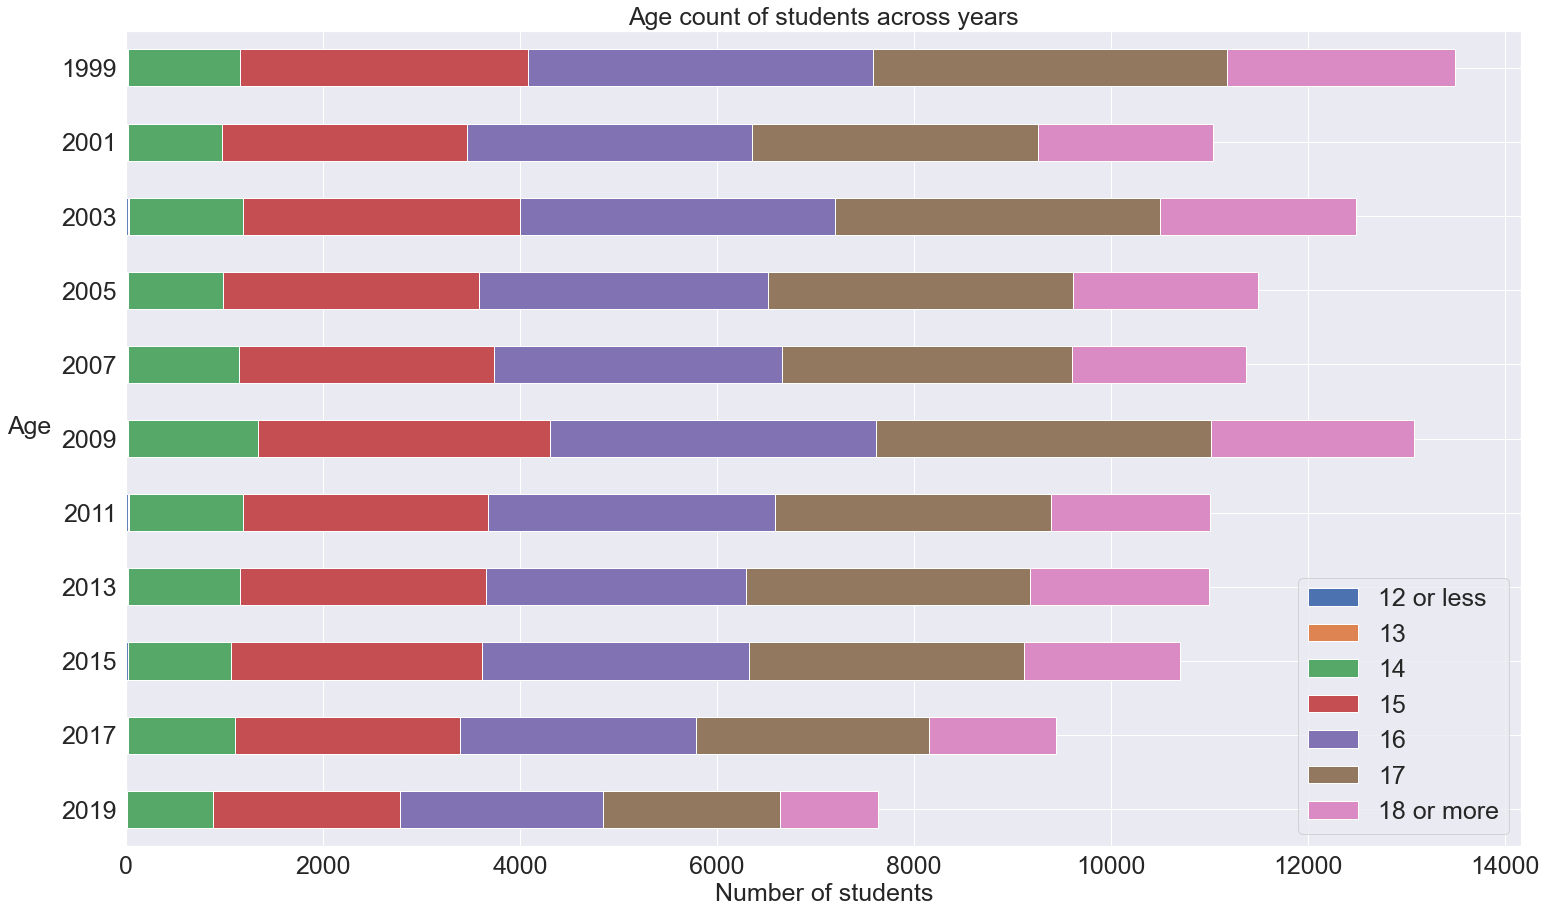

In [13]:
# Examine the distribution of age (because the blue gradient plot is a count plot, we can get rid of our normal count plot)
variable = "age"

# This proprtion-based grouped bar plot is much different than the rest because Professor Ellis suggested this plot to be a
# horizontal stacked bar plot with a gradient. Don't call the barPlotHelper() function for this one. Make a grouped bar plot
# separated by age groups.
# Create a dictionary for years-proportion pairs
agePairs = {}
for age in ["12 or less", "13", "14", "15", "16", "17", "18 or more"]:
    agePairs[age] = students["year"][students["age"] == age].value_counts().sort_index().tolist()

df = pd.DataFrame(agePairs, index = np.sort(students["year"].unique().tolist()))

# Set labels and show the plot
ax = df.plot.barh(rot = 0, title = "Age count of students across years", stacked = True)
ax.invert_yaxis()
ax.set_xlabel("Number of students")
ax.set_ylabel("Age        ", rotation = 0)
plt.show()

Some information about the age plot is below.
- Very few students are 13 years or younger, which matches our expectations. Those few students who are 13 or younger are probably some rare fast learners.
- The median age seems to be around 16 for all years. There are a few students that are 14 or 18+ years old, but this is normal for high school.
- The number of students strangely seems to be decreasing as we get closer to 2019. There seems to be no information in the manuals that explains this phenomenon. We may want to examine our data in terms of time for our results section just to be safe.

We're concerned about the responses for 13 or less, however. For our final project, we're looking to use Chi-square tests in our EDA, but one of the conditions for this test is to have no cells with an expected value of 3 or less.

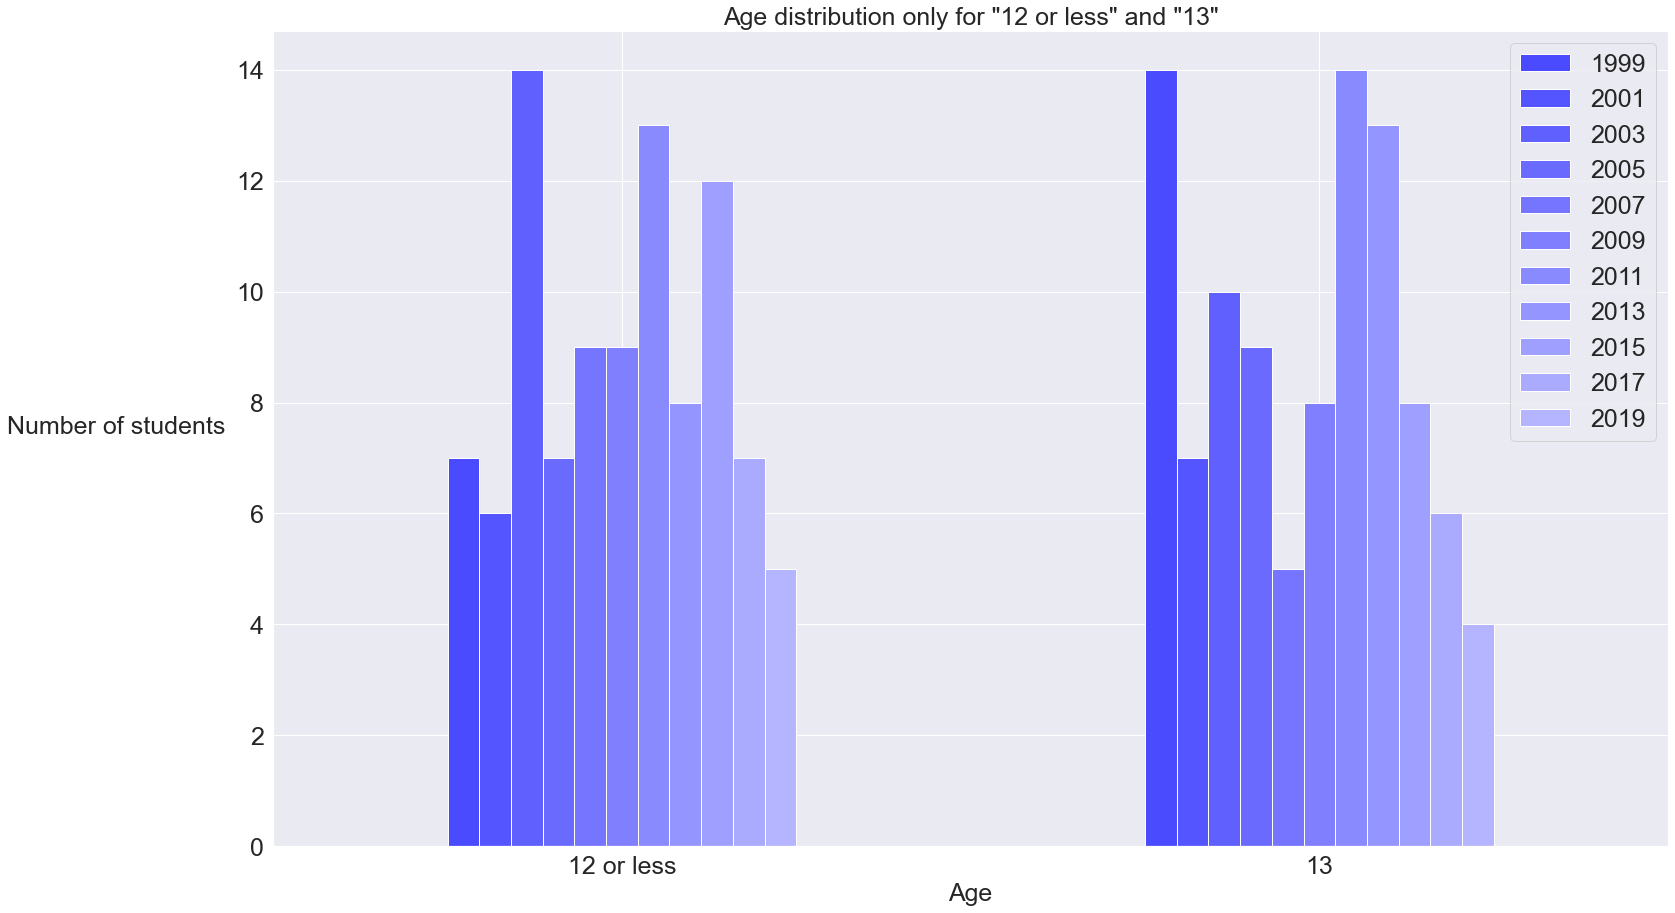

In [14]:
# This bar plot is also a unique one, so don't call the barPlotHelper() function
# Make a grouped bar plot separated by years
variable = "age"
subset = students.copy()
subset = subset[(subset["age"] == "12 or less") | (subset["age"] == "13")]

# Calculate the counts for each year
yearPairs = {}
year = 1999
while(year <= 2019):
    yearPairs[str(year)] = subset[variable][subset["year"] == year].value_counts().sort_index()
    year += 2
df = pd.DataFrame(yearPairs, index = np.sort(subset[variable].unique().tolist()))

# Set labels and show the plot
ax = df.plot.bar(rot = 0, title = "Age distribution only for \"12 or less\" and \"13\"", color = colors)
ax.set_xlabel("Age")
ax.set_ylabel("Number of students                                 ", rotation = 0)
plt.show()

Before explaining our interpretation, we want to clarify the meaning of the blue gradient of this plot. The darkest color corresponds to 1999 while the lightest color corresponds to 2019. This gradient is reused in future plots, so we'll only display the legend in the age plot for reference.

What we see isn't auspicious for our Chi-square tests because the highest value in all bars is 14 students. Compared to 10,000s of students in each year's dataset, this is miniscule, which may cause us to fail the conditions for some of the tests. Additionally, pruning these students from the dataset shouldn't have much of an impact on our results because of the low count.

In [15]:
# Prune "12 or less" and "13"
students = students[(students["age"] == "14") |
                    (students["age"] == "15") |
                    (students["age"] == "16") |
                    (students["age"] == "17") |
                    (students["age"] == "18 or more")]

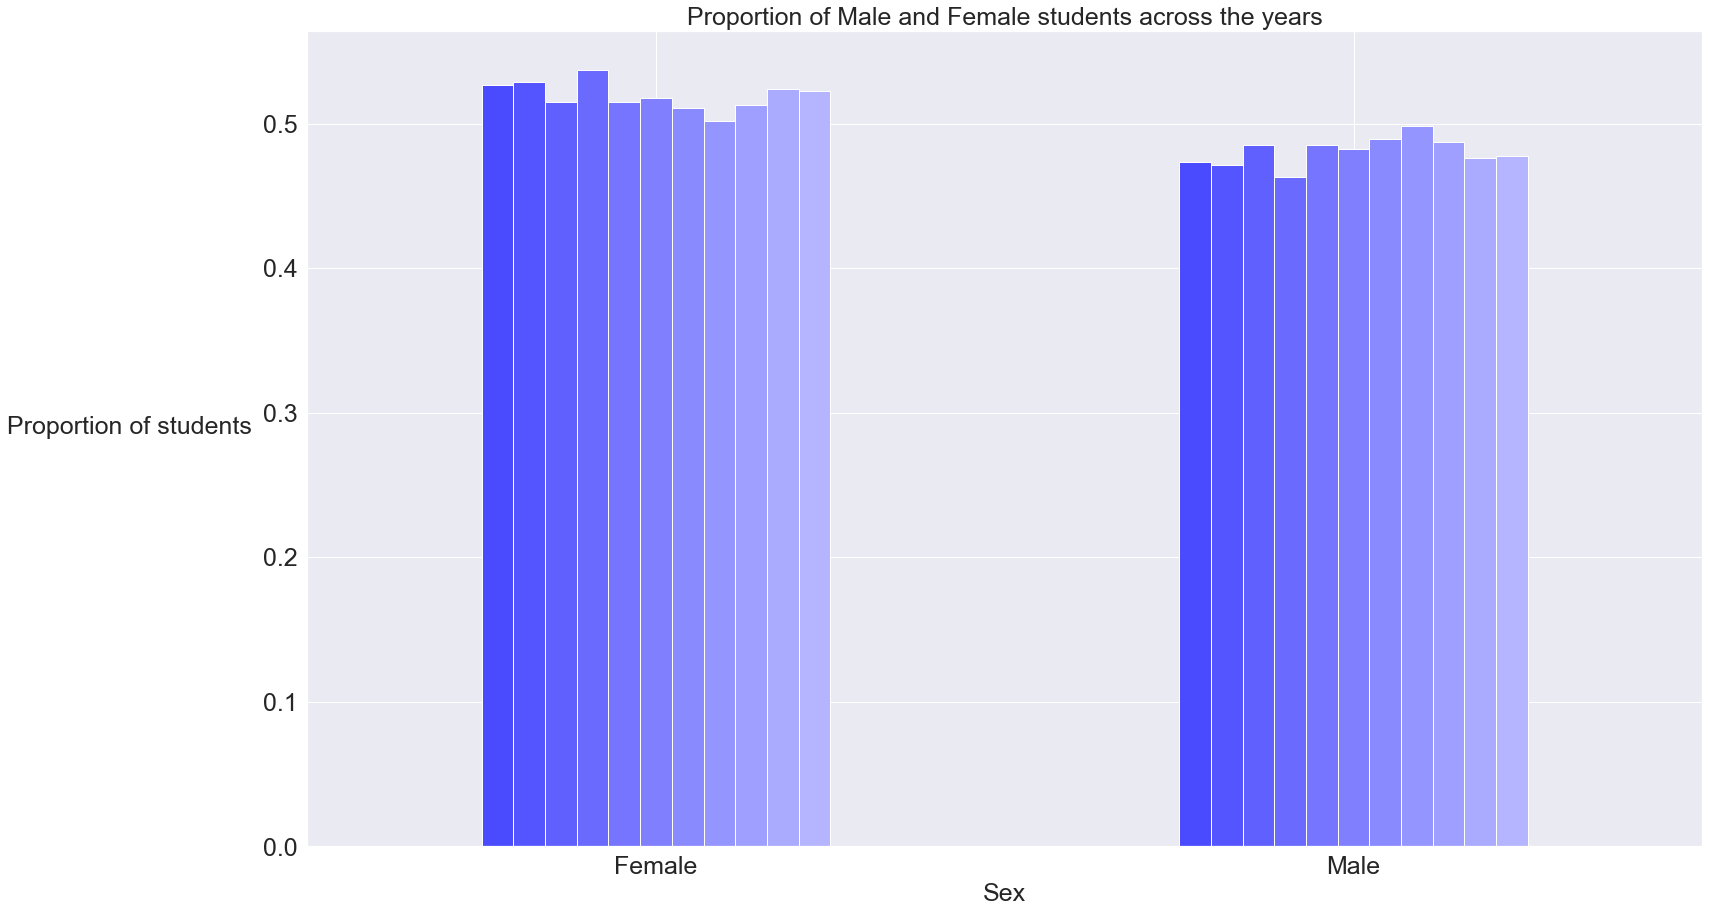

In [16]:
# Examine the distribution of sex
variable = "sex"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
barPlotHelper(variable, "Proportion of Male and Female students across the years", "Sex",
              "Proportion of students                                     ", False, [])

This is interesting to see. Overall, the proportion of female students is greater than the proportion of male students. Across all the years, these values still aren't out of the ordinary because the proportion of male and female students in each year is around 0.5.

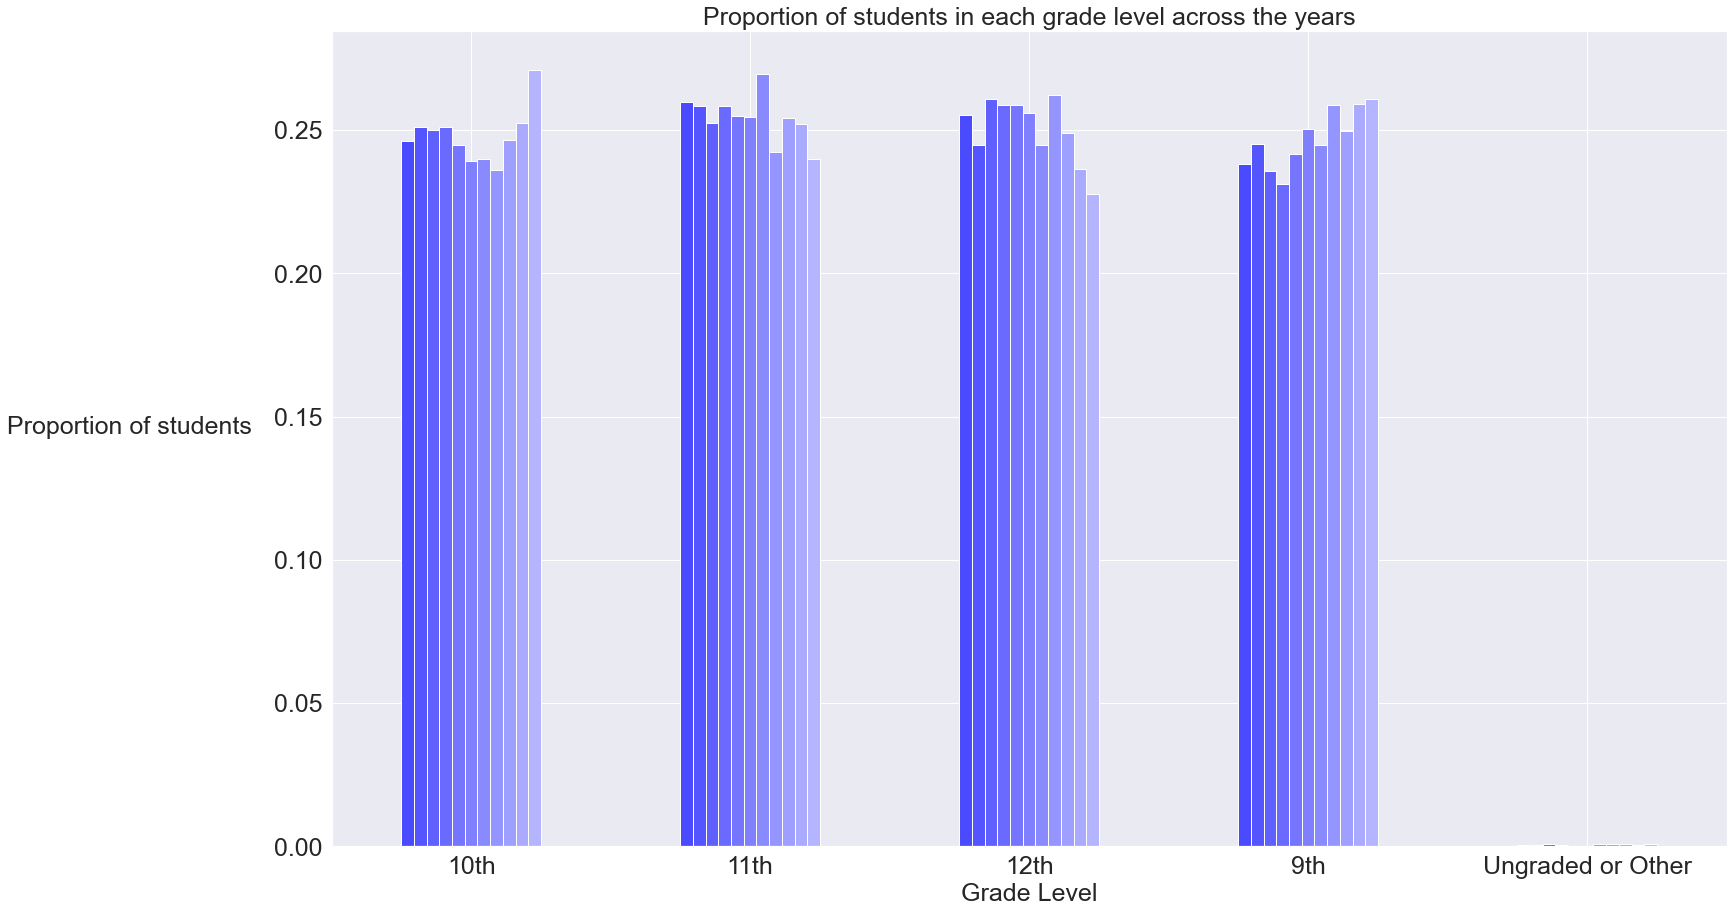

In [17]:
# Examine the distribution of grade levels
variable = "grade"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
barPlotHelper(variable, "Proportion of students in each grade level across the years", "Grade Level",
              "Proportion of students                                        ", False, [])

Just as expected, these proportions of students in each of these grade levels for each year should be roughly uniformly distributed; however, we are a bit skeptical of the "ungraded or other" students. The manuals do not specify what types of students these are, and it's possible that they may not even be high school students.

In [18]:
# Check to see how many students are ungraded or other
print("Number of \"Ungraded or Other\" students:", len(students[students["grade"] == "Ungraded or Other"]))

# Let's remove them
students = students[students["grade"] != "Ungraded or Other"]

Number of "Ungraded or Other" students: 70


Only 70 out of the 100,000+ students are "Ungraded or Other," so pruning them should have a minute effect on our analysis.

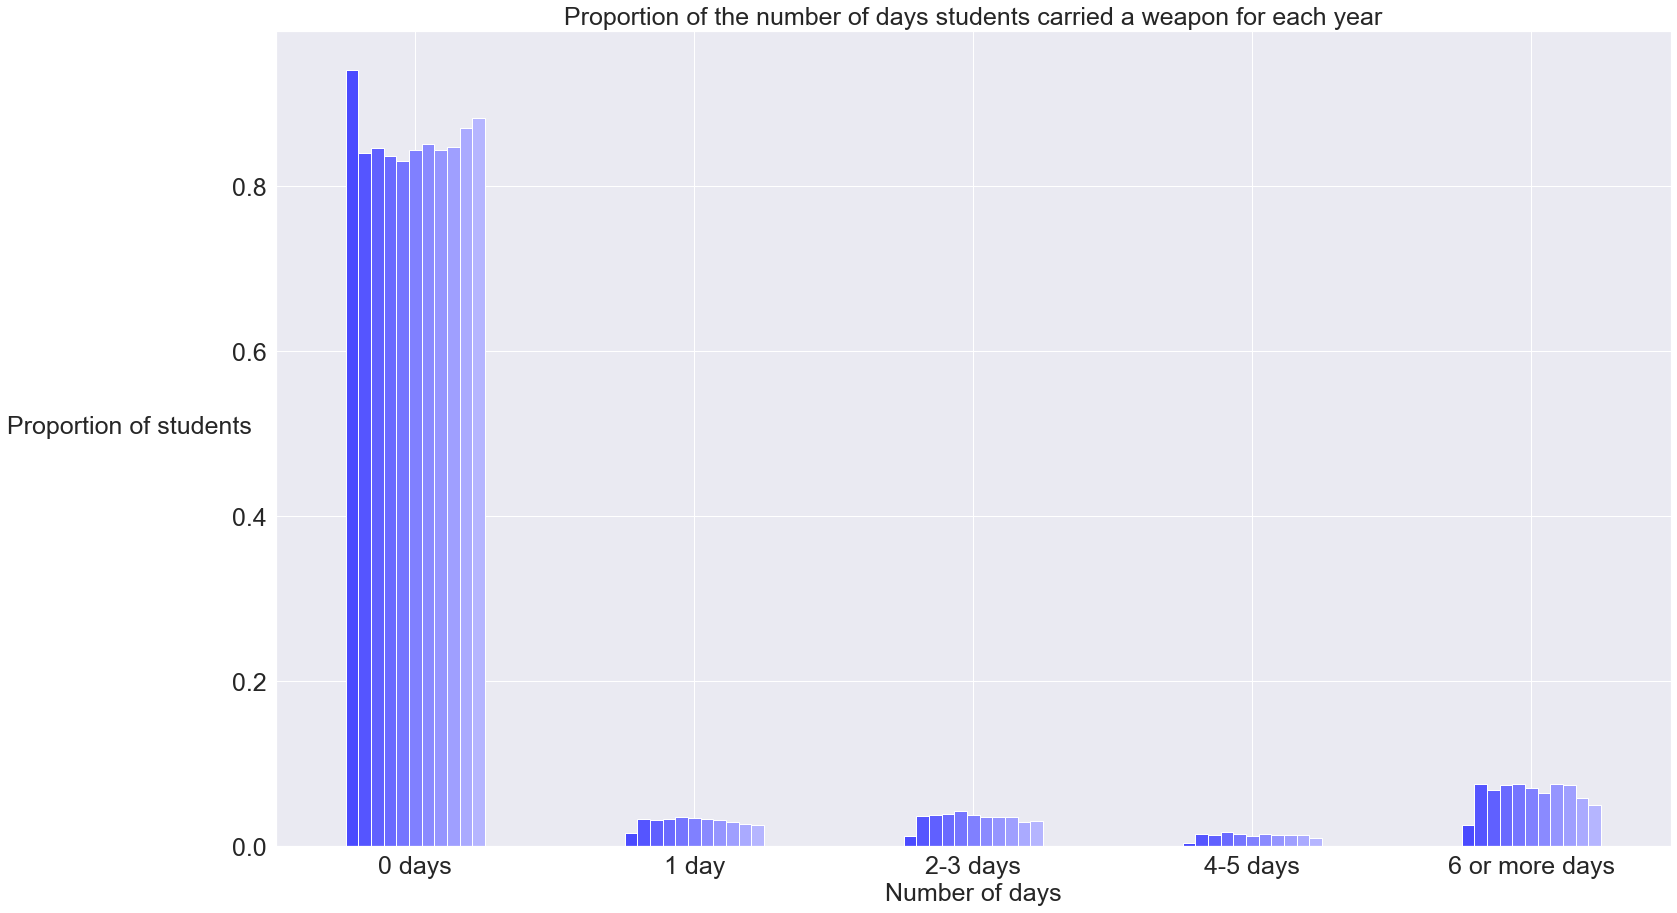

In [19]:
# Examine the distribution of number of days the student carried a weapon
variable = "weapon"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
barPlotHelper(variable, "Proportion of the number of days students carried a weapon for each year", "Number of days",
              "Proportion of students                            ", False, [])

Note: this question specifies in the past 30 days  
Looking at the first plot (count bar plot), we expected to see the majority of students put 0 days, but out of the other responses, "6 or more days" has a proportion of responses that's rather high compared to the proportion of responses for "1 day," "2-3 days," and "4-5 days." This is still reasonable, however, because that category doesn't have a limited range of days like the other categories do. Finally, it seems like 1999's dataset has a considerably higher proportion of students who put "0 days." It's still not too far from the other year's proportions, though.

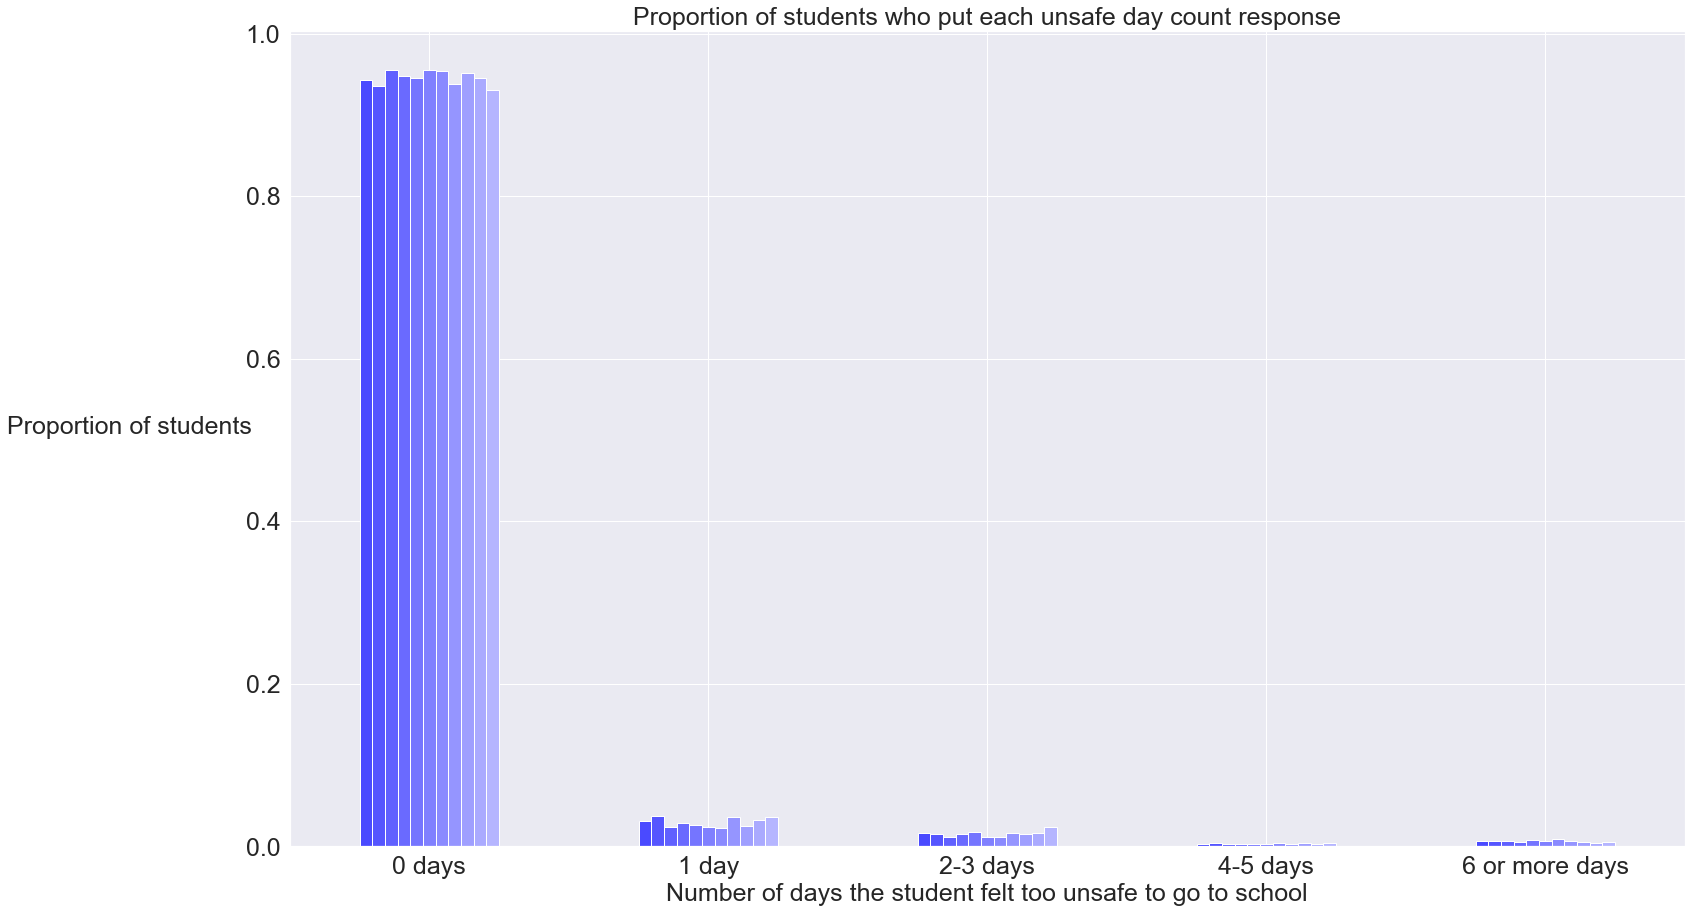

In [20]:
# Examine the distribution of number of days the student felt unsafe
variable = "unsafe"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
barPlotHelper(variable, "Proportion of students who put each unsafe day count response",
              "Number of days the student felt too unsafe to go to school",
              "Proportion of students                                ", False, [])

Note: this question specifies in the past 30 days  
There's nothing too special here. The main takeaway is that most students once again put "0 days." A small thing we noticed is the difference in the proportion of responses for "6 of more days" in both the unsafe and weapon columns (the proportions for "unsafe" are way lower). Because the question for the "weapon" column is about carrying a weapon in general and not specifically on a school campus, there probably isn't a confounding relation between these two variables.

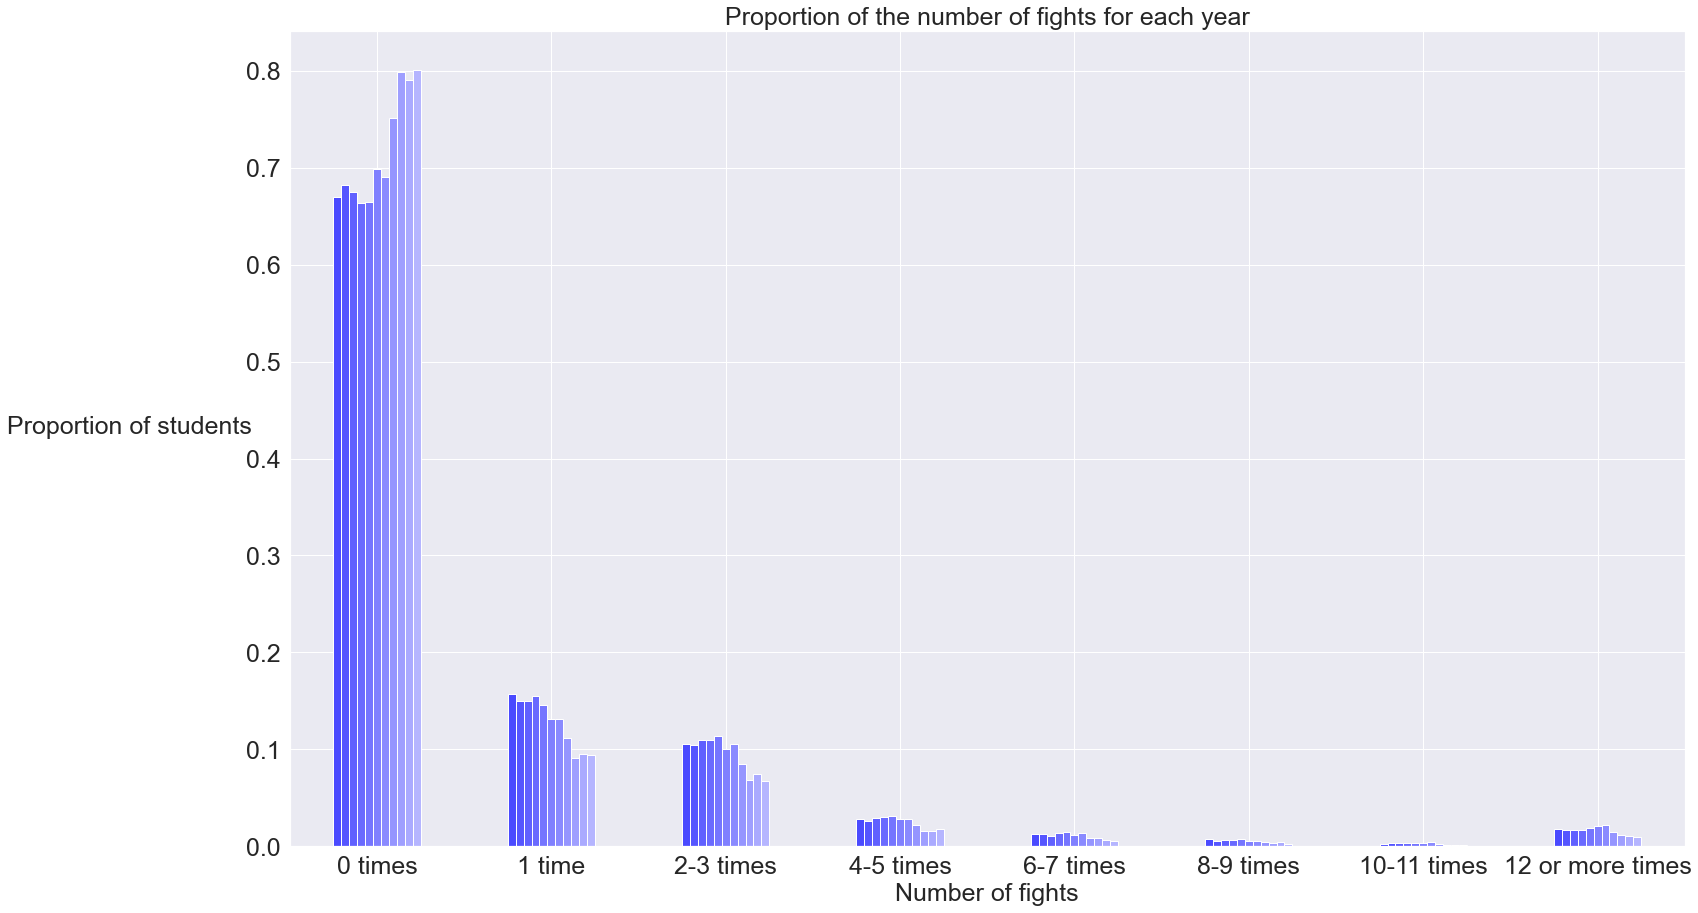

In [21]:
# Examine the distribution of number of days the student felt unsafe
variable = "fight"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 times", "1 time", "2-3 times", "4-5 times", "6-7 times", "8-9 times", "10-11 times", "12 or more times"]
barPlotHelper(variable, "Proportion of the number of fights for each year", "Number of fights",
              "Proportion of students                                ", False, reindexArray)

Note: this question specifies in the past 12 months  
Most students put "0 times" again, but we now see a decent proportion of responses other than "0 days." Although variable "fights" is an ordinal categorical variable, there's a much more noticeable "skew" in the right direction for this plot. This is also the first time that we have a variable that shows a noticeable increase in the proportion of students who put the "0 times/days" response over the years, albeit this this only starts happening at around 2009. Additionally, similarly to the plots for the "weapon" variable, there seems to be a slight increase when looking at the the number of students who put "12 or more times."

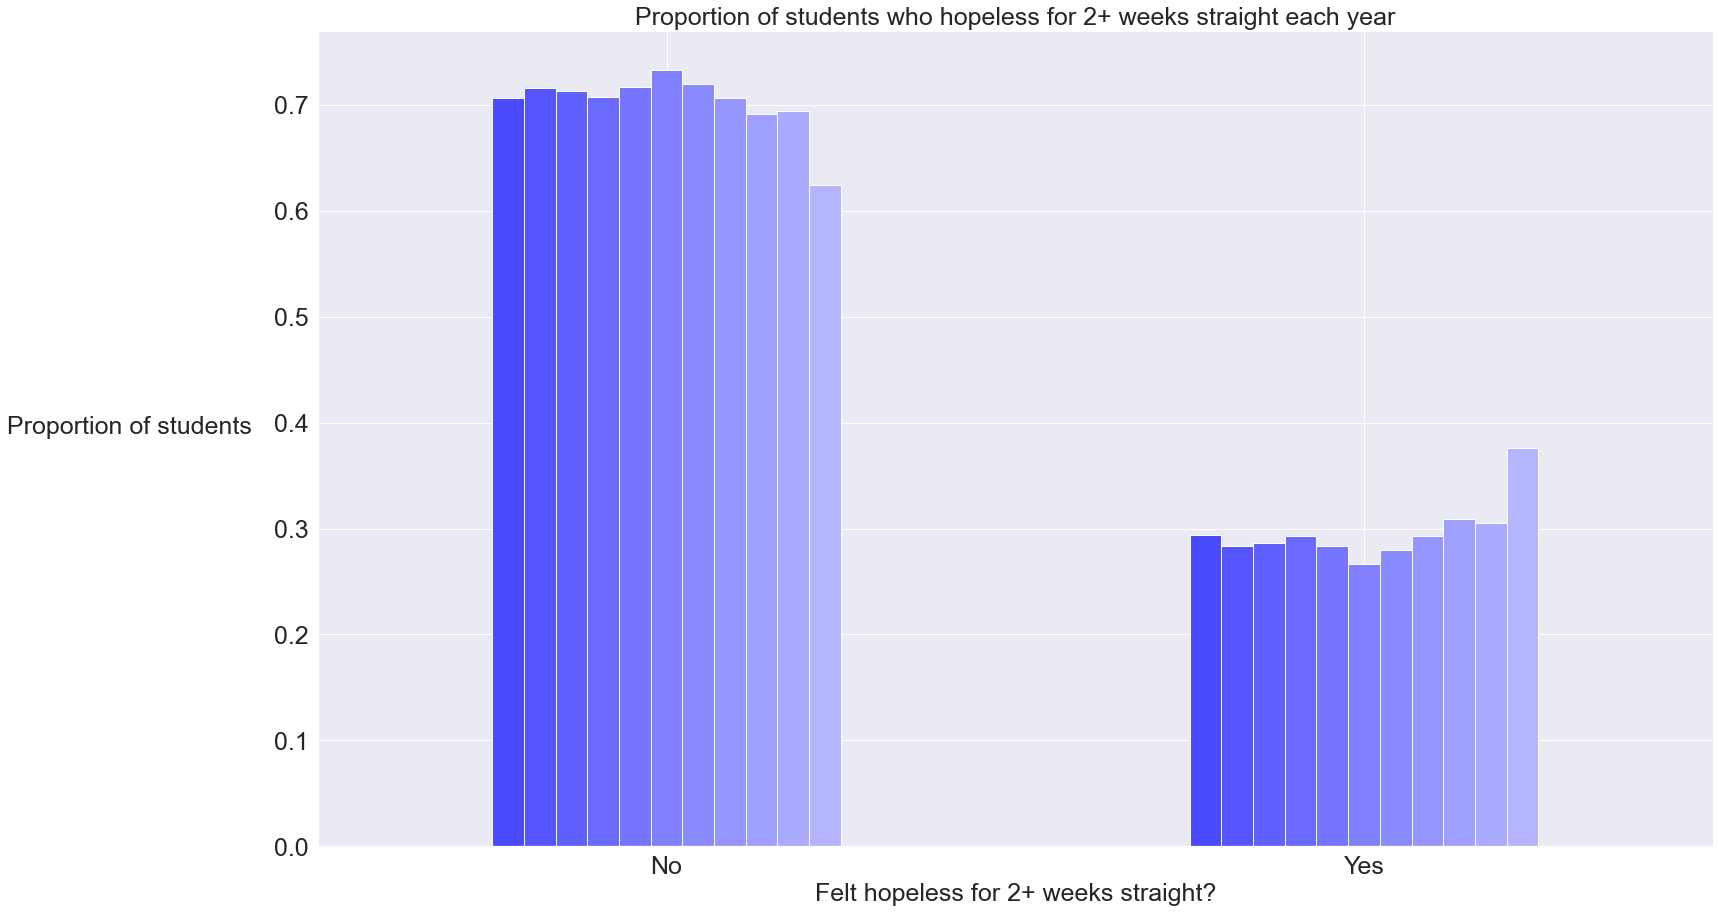

In [22]:
# Examine the distribution of number of days the student felt sad or hopeless
variable = "hopeless"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
barPlotHelper(variable, "Proportion of students who hopeless for 2+ weeks straight each year",
              "Felt hopeless for 2+ weeks straight?", "Proportion of students                                        ", False, [])

Note: this question specifies in the past 12 months  
That's quite a lot of high school students who felt hopeless way in the span of 12 months for their year, especially for year 2019, which saw a rather large jump in the proportion of students who said they felt hopeless for 2+ weeks straight.

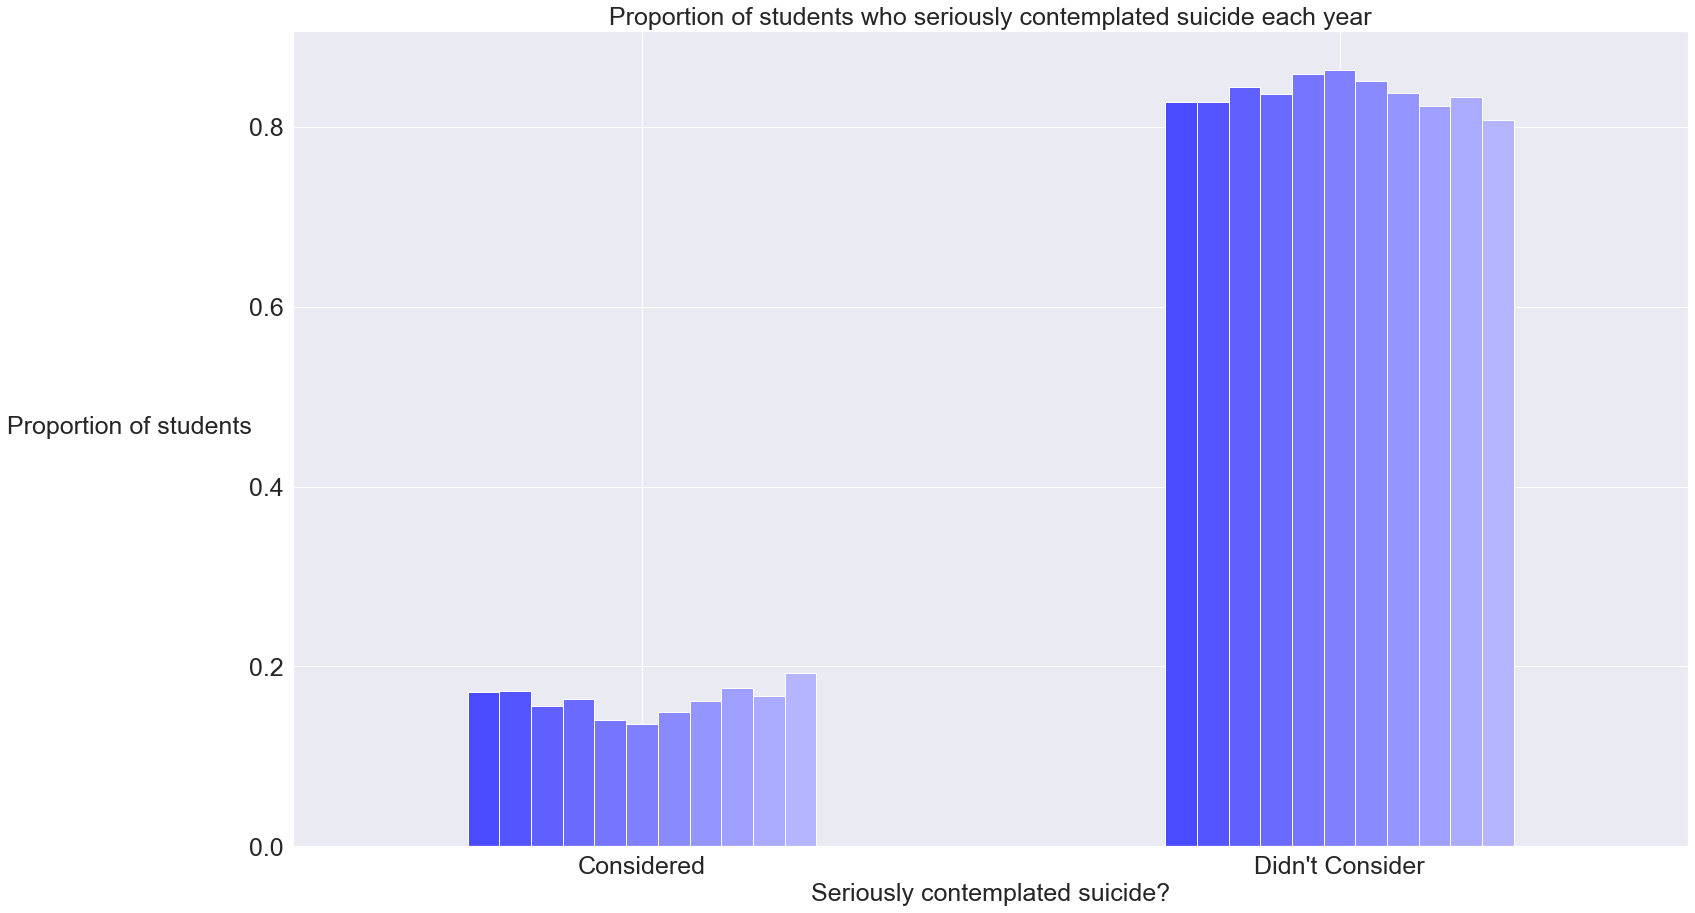

In [23]:
# Examine the distribution of number of days the student felt suicidal
variable = "suicide"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
barPlotHelper(variable, "Proportion of students who seriously contemplated suicide each year", "Seriously contemplated suicide?",
              "Proportion of students                                 ", False, [])

Note: this question specifies in the past 12 months  
That's also a lot of students who seriously considered suicide; hopefully they're alright. Unlike the plot for students feeling hopeless, however, none of the proportion of students who seriously considered suicide spiked in any given year.

This also raises a small concern: is there a confounding relationship between the "hopeless" and "suicide" variables? We'll keep this in mind when checking for confounding variables in our Poisson regression models.

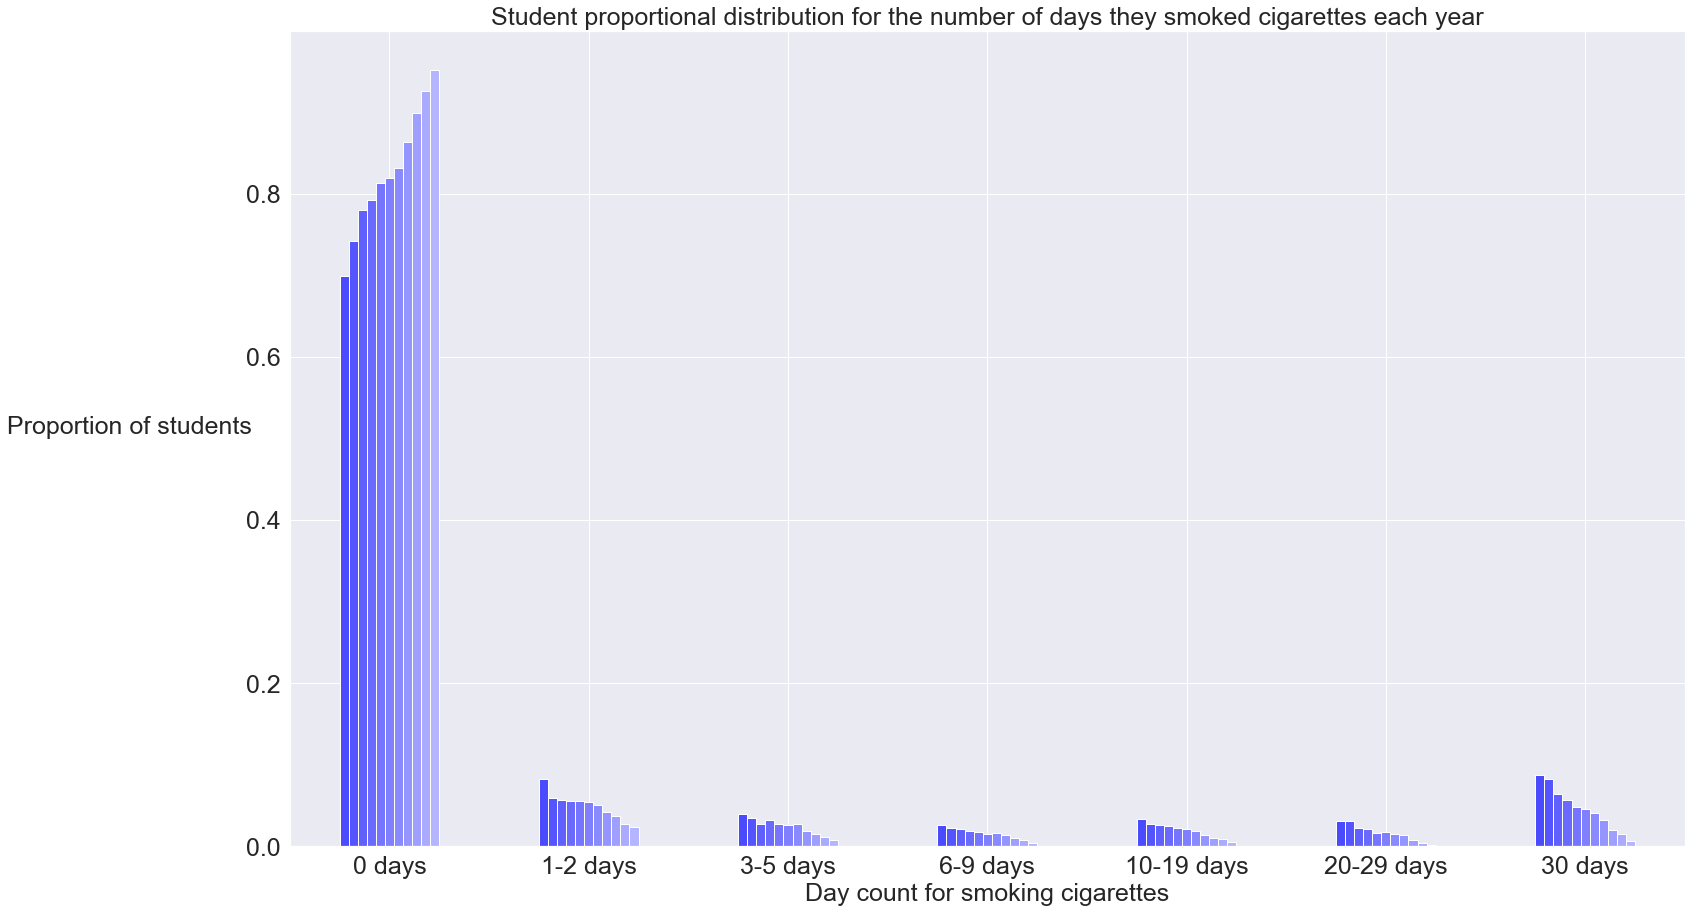

In [24]:
# Examine the distribution of number of days the student smoke cigarettes
variable = "cigarette"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 days", "1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "30 days"]
barPlotHelper(variable, "Student proportional distribution for the number of days they smoked cigarettes each year",
              "Day count for smoking cigarettes", "Proportion of students                                ", False, reindexArray)

Note: this question specifies in the past 30 days  
Like usual, most students put "0 days;" however, there is a strictly increasing proportion of students who put "0 days," which is the first plot that exhibits such a pattern. In fact, the proportion of responses for that option increased quite a lot, going from 0.70 in 1999 to somewhere around 0.95 in 2019. One other small thing to note is that there is a slight increase in the proportion of students who put "30 days" than in the other responses above "0 days," but this difference becomes less noticeable as we we approach 2019.

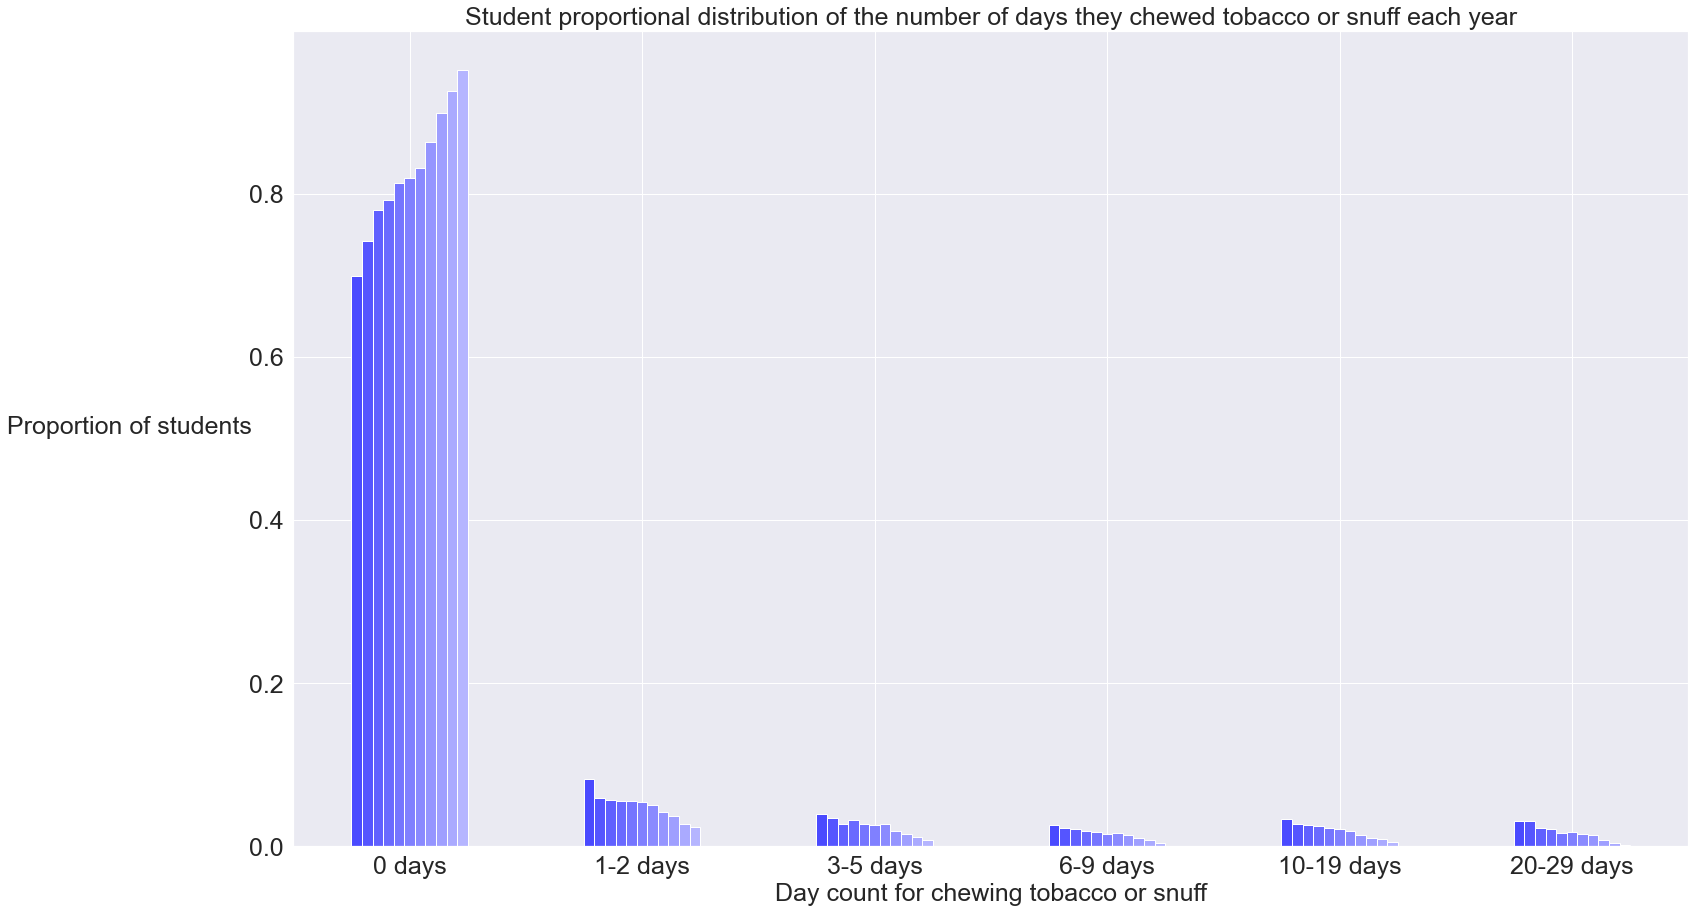

In [25]:
# Examine the distribution of number of days the student chewed tobacco or snuff

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 days", "1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days"]
barPlotHelper(variable, "Student proportional distribution of the number of days they chewed tobacco or snuff each year",
              "Day count for chewing tobacco or snuff", "Proportion of students                                 ", False, reindexArray)

Note: this question specifies in the past 30 days  
There is another unexpected increase in the proportion of students who put "0 days" again, although unsurpsingly at this point, most students put "0 days."

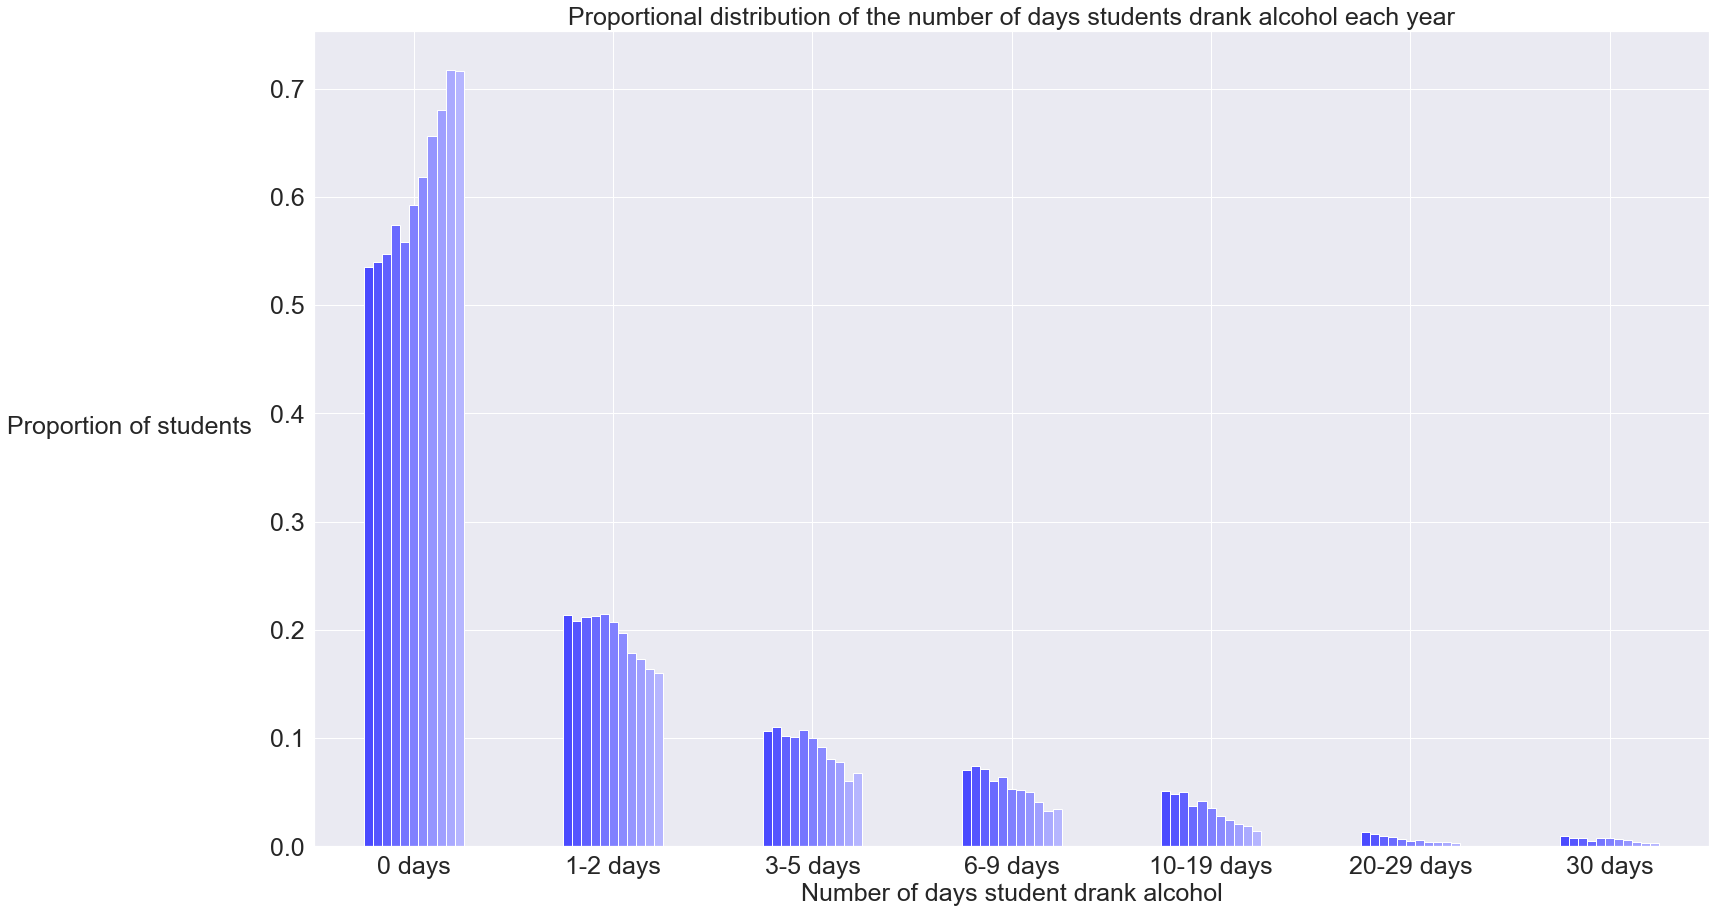

In [26]:
# Examine the distribution of number of days the student had at least one drink of alcohol
variable = "alcoholFrequency"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 days", "1-2 days", "3-5 days", "6-9 days", "10-19 days", "20-29 days", "30 days"]
barPlotHelper(variable, "Proportional distribution of the number of days students drank alcohol each year",
              "Number of days student drank alcohol", "Proportion of students                                       ", 
              False, reindexArray)

Note: this question specifies in the past 30 days  
Good to see that most students don't drink alcohol in those 30 days, although we see an increasing proportion of students who put "0 days" in their responses as time goes on. Once again, while this variable is a categorical variable, the "shapes" of both plots have "skews" in the right direction, similarly to the proportion plot for physical fights. This time, however, this "skew" is much more noticeable.

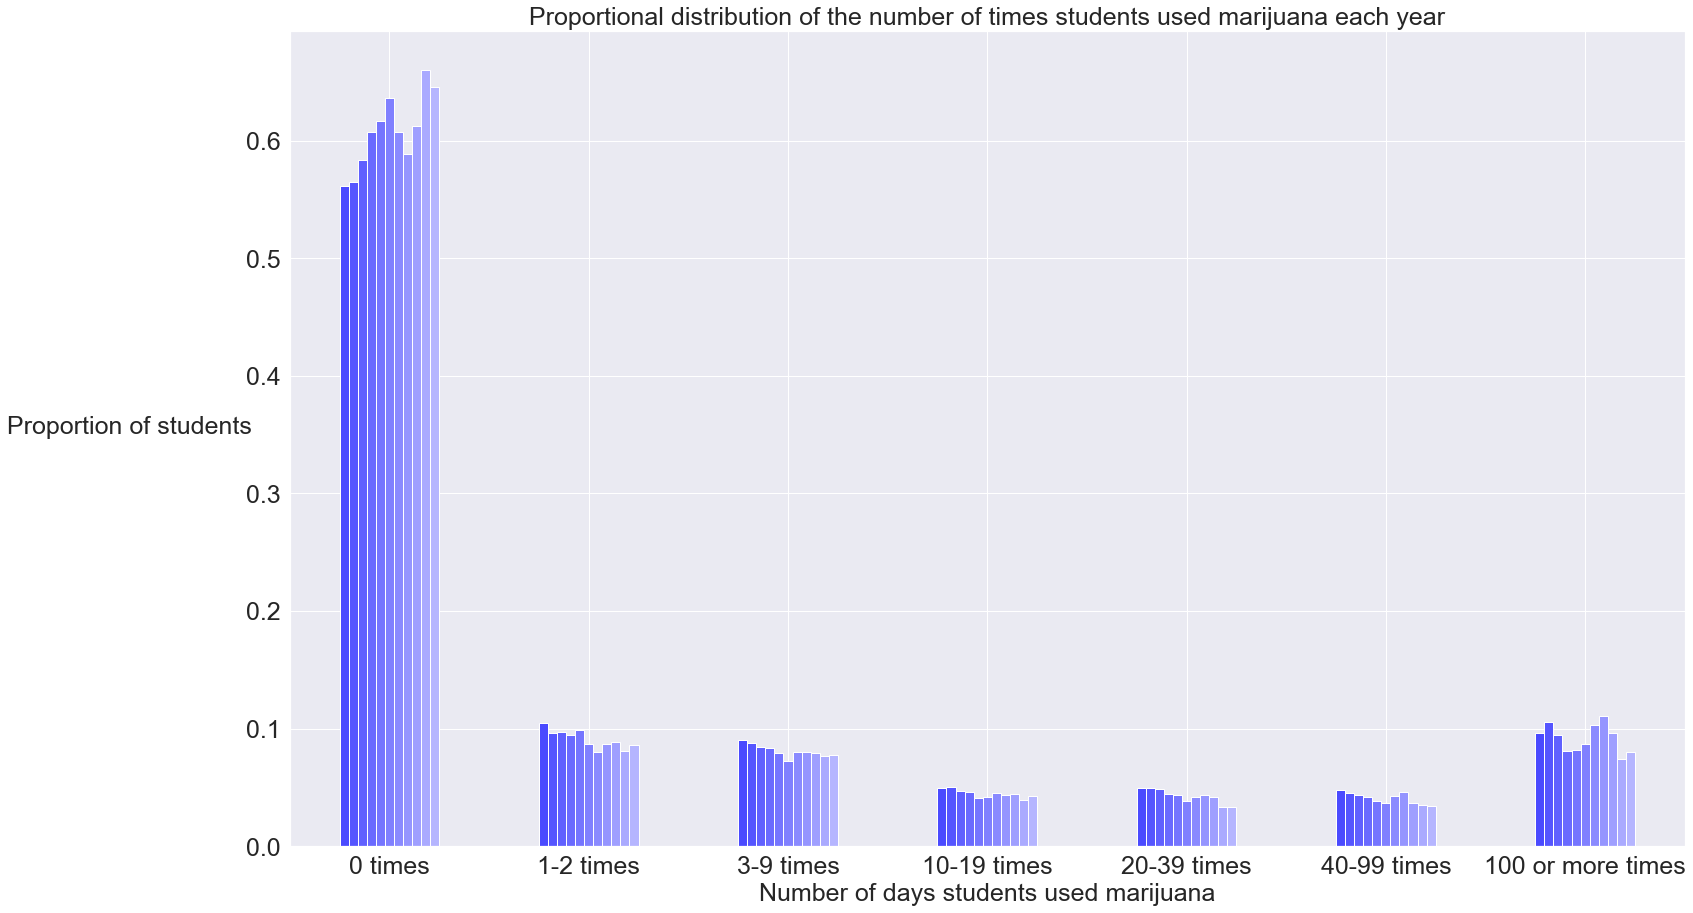

In [27]:
# Examine the distribution of number of days the student used marijuana
variable = "marijuana"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40-99 times", "100 or more times"]
barPlotHelper(variable, "Proportional distribution of the number of times students used marijuana each year",
              "Number of days students used marijuana", "Proportion of students                                ", 
              False, reindexArray)

Note: this question specifies during the student's life  
As expected again, most students put "0 times," although this timen the proportion of students who put that answer increased over the years but not strictly. This time, however, it seems like the proportion of students who put other responses is a bit higher than usual for the categories above "0 times." Perhaps those students simply wanted to try marijuana? What's noticeable is the proportion of students who put "100 or more times." This is also one of those plots that once we reach the rightmost category ("100 or more times"), we see a sudden increase in the proportion of students who selected that option. This shouldn't be out of the ordinary because there are people who've made the use of marijuana a habit. Plus, it's also a legalized drug in some states.

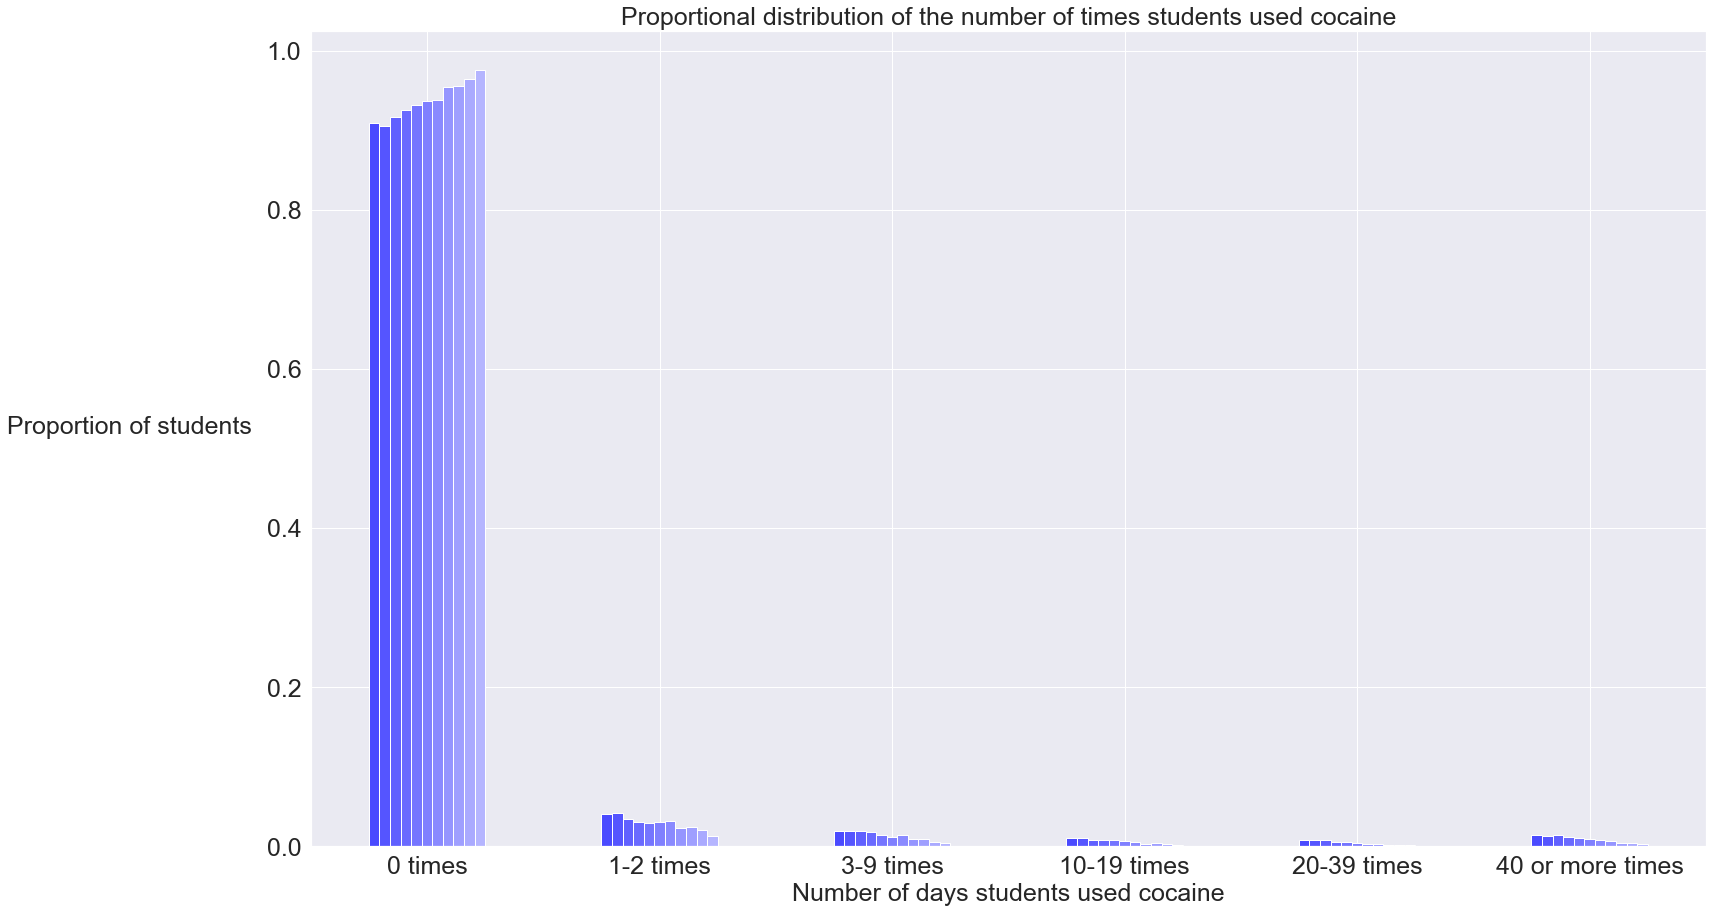

In [28]:
# Examine the distribution of number of days the student used cocaine
variable = "cocaine"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"]
barPlotHelper(variable, "Proportional distribution of the number of times students used cocaine", 
              "Number of days students used cocaine", "Proportion of students                                      ", 
              False, reindexArray)

Note: this question specifies in the past 30 days  
We hope we aren't boring you by constantly saying that most students put "0 times" with an increasing proportion of respondants in that category as time goes on. Nevertheless, that's what's happening in the plot for cocaine. One thing to point out is that the increase is not as sharp as it is in the previous plots we've seen.

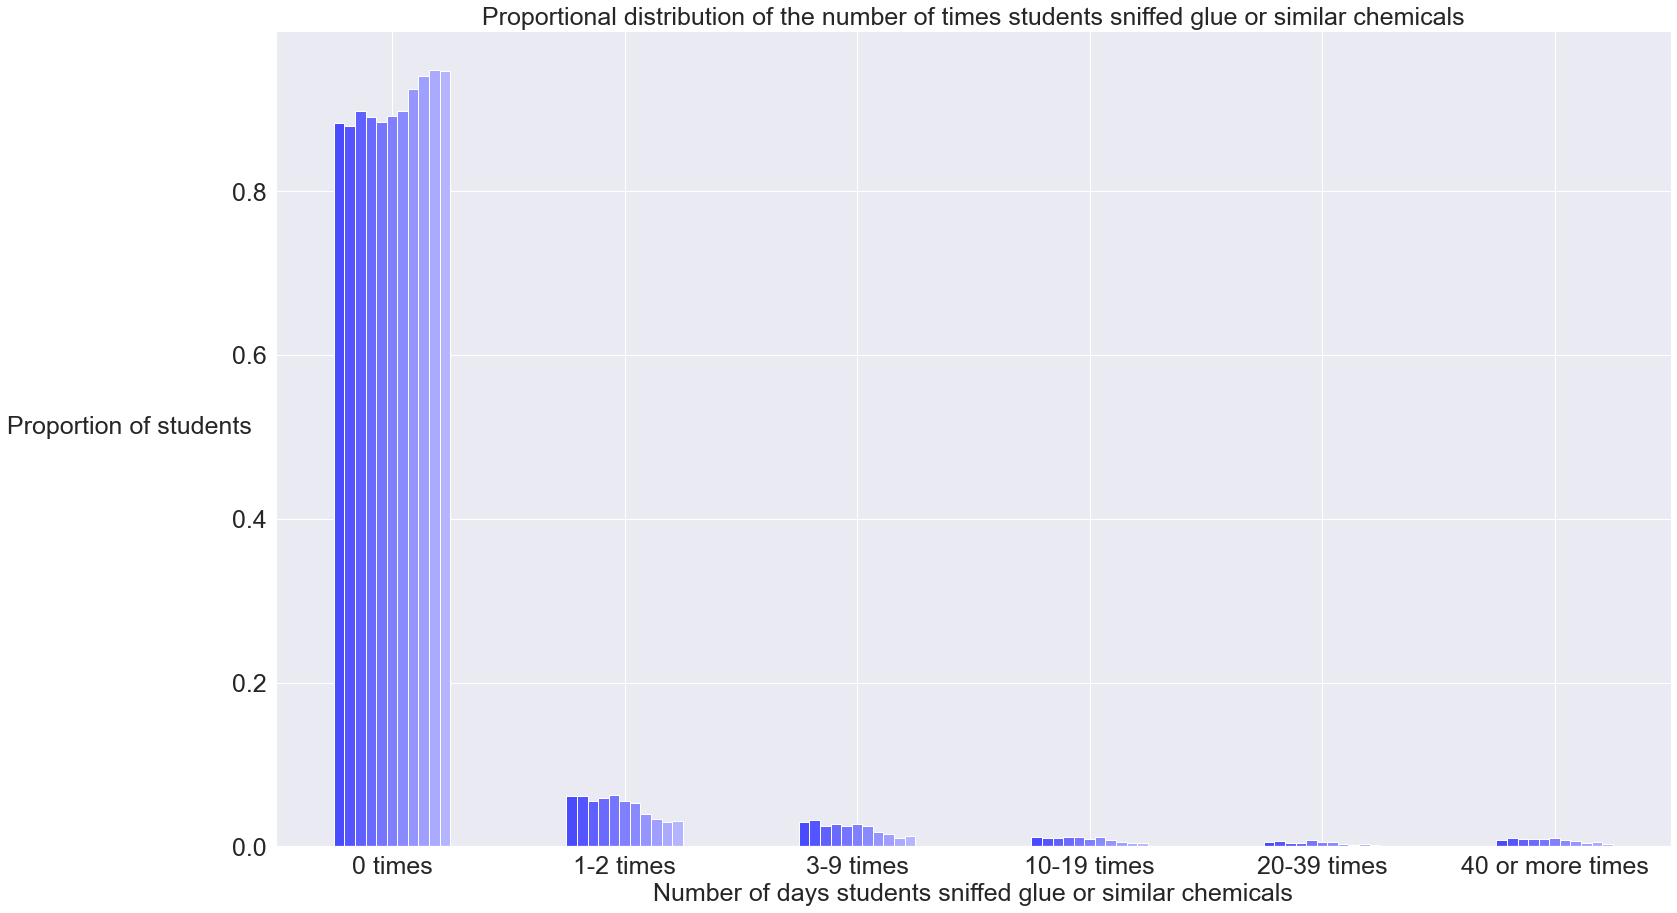

In [29]:
# Examine the distribution of number of days the student sniffed glue or similar chemicals
variable = "sniffed"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"]
barPlotHelper(variable, "Proportional distribution of the number of times students sniffed glue or similar chemicals", 
              "Number of days students sniffed glue or similar chemicals", "Proportion of students                            ", 
              False, reindexArray)

Note: this question specifies in the past 30 days  
At this point, we don't really know what to say without making this super boring. The observations here are the same as in the interpretations for the plots about the number of times students used cocaine in the past 30 days.

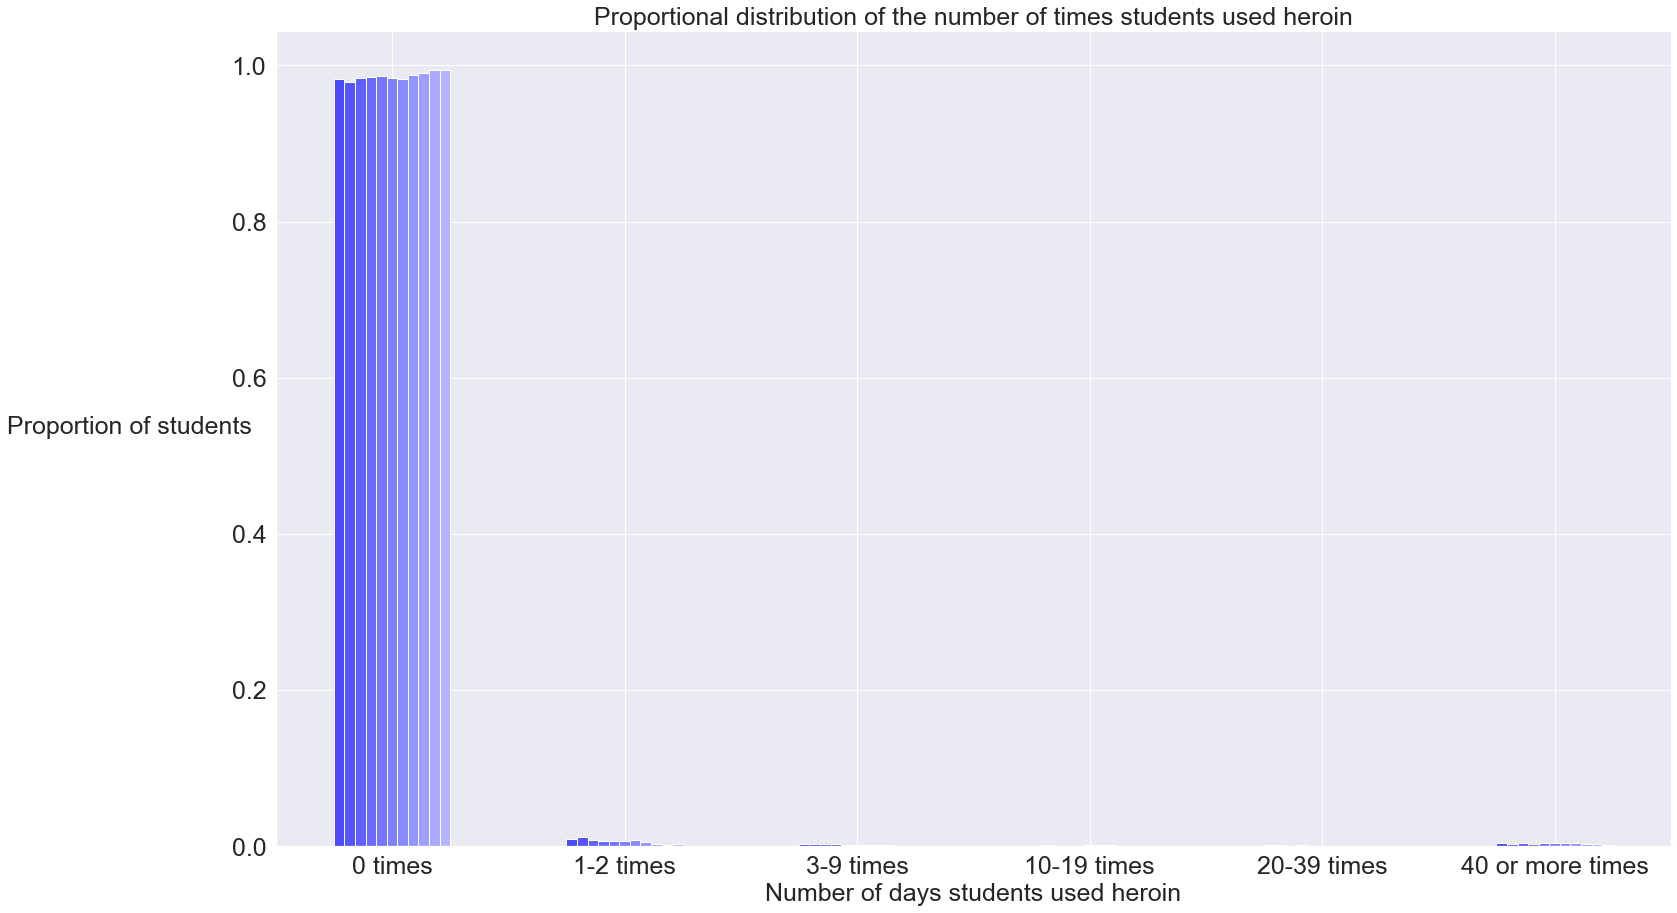

In [30]:
# Examine the distribution of number of days the student used heroin
variable = "heroin"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"]
barPlotHelper(variable, "Proportional distribution of the number of times students used heroin", 
              "Number of days students used heroin", "Proportion of students                            ", False, reindexArray) 

Note: this question specifies in the past 30 days  
Finally, we get something that's somewhat different. Well, most people still put "0 times," but the responses are fairly uniformly distributed across the years. In fact, almost 100% of the respondants in each year said they never used heroin in the past 30 days.

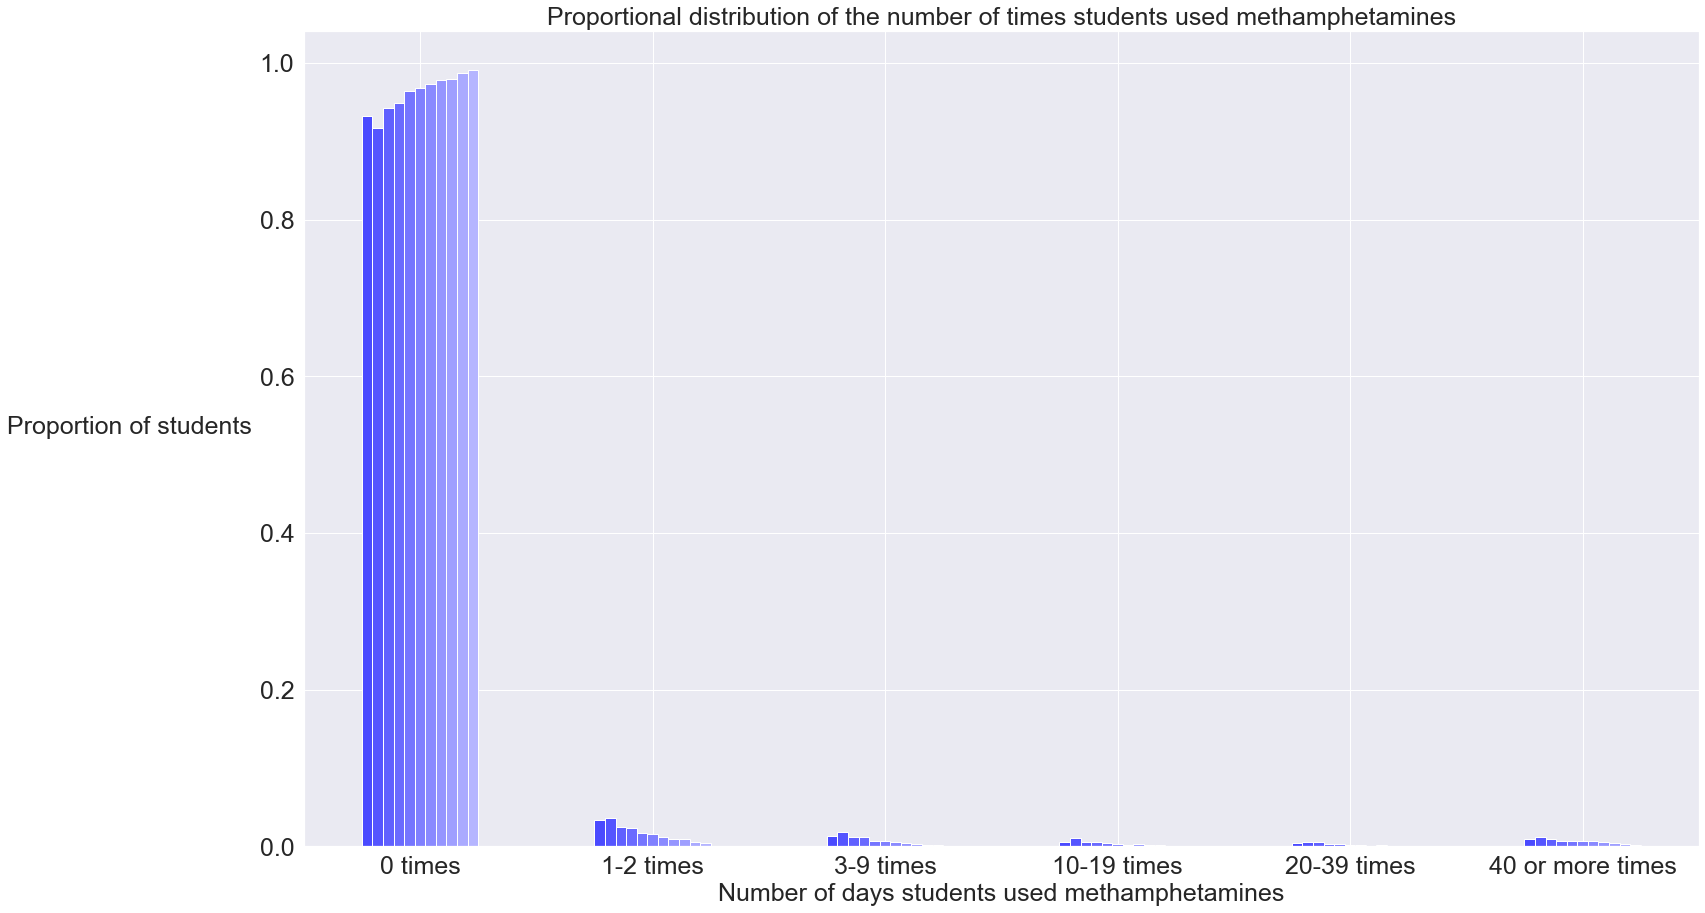

In [31]:
# Examine the distribution of number of days the student used methamphetamines
variable = "methamphetamines"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"]
barPlotHelper(variable, "Proportional distribution of the number of times students used methamphetamines", 
              "Number of days students used methamphetamines", "Proportion of students                                    ", 
              False, reindexArray)

Note: this question specifies in the past 30 days  
Most students put "0 times" again. We see the same observations as we did in the plots for "cocaine" and "sniffed:" there is a increase in the proportion of students who put "0 times," although it's very slight.

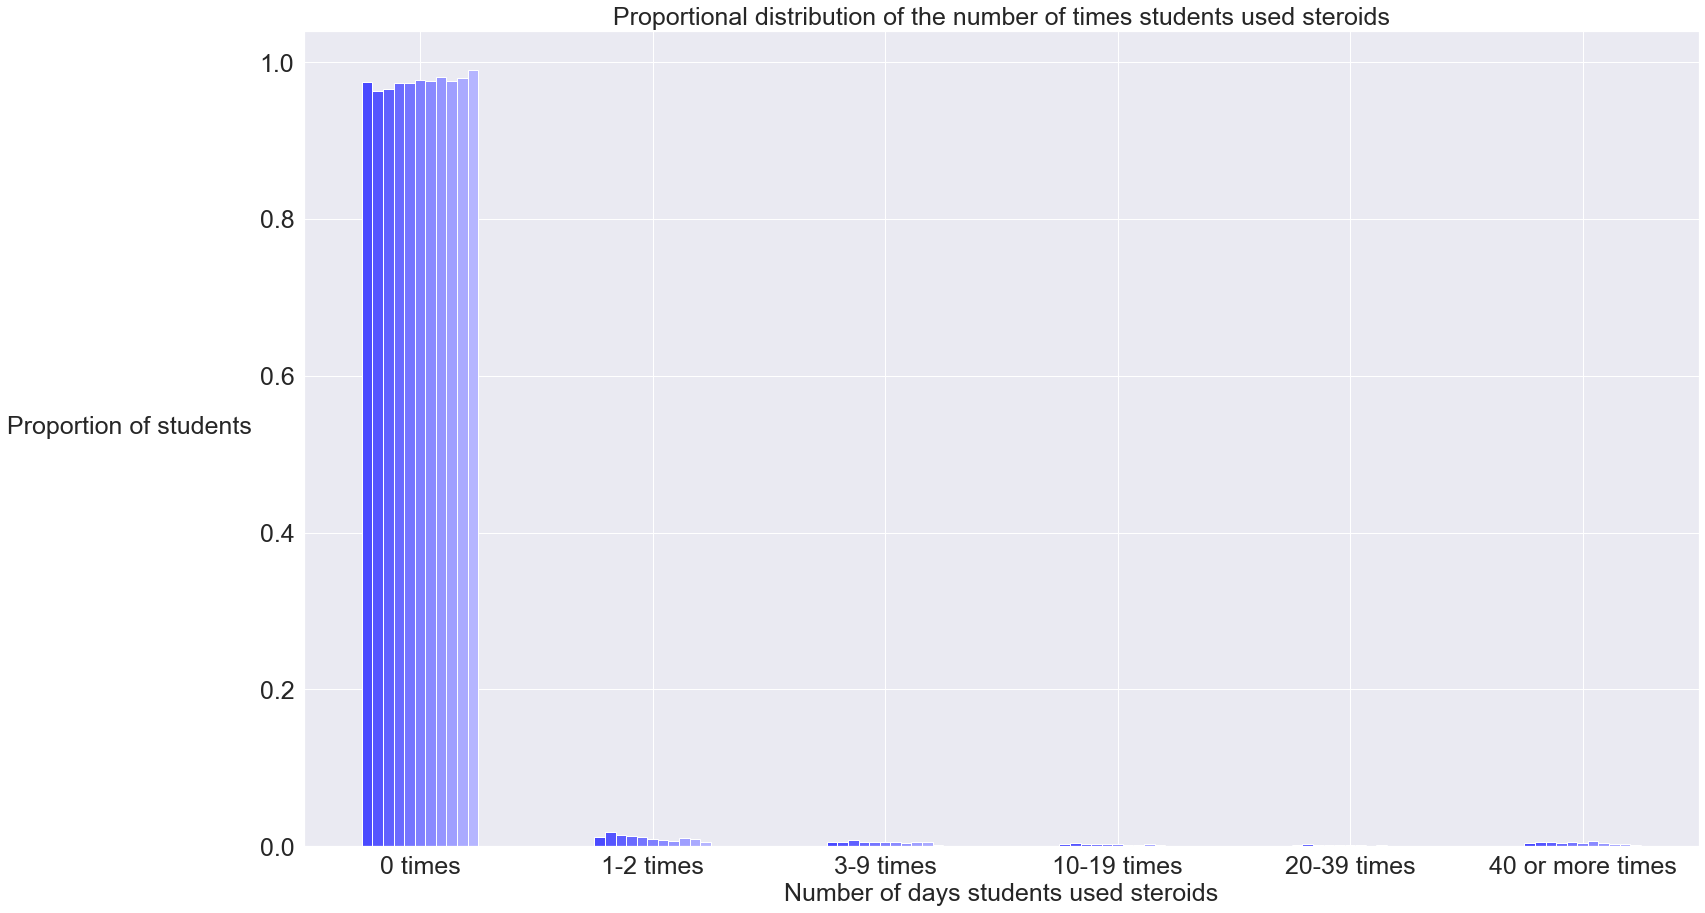

In [32]:
# Examine the distribution of number of days the student used steroids
variable = "steroids"

# Make a grouped bar plot separated by years
# Add spaces to the y label to offset it so it doesn't overlap with the plot
reindexArray = ["0 times", "1-2 times", "3-9 times", "10-19 times", "20-39 times", "40 or more times"]
barPlotHelper(variable, "Proportional distribution of the number of times students used steroids", 
              "Number of days students used steroids", "Proportion of students                                    ", 
              False, reindexArray)

Note: this question specifies in the past 30 days  
For the plot for "steroids," it exhibits a pattern similar to the plot for "heroin:" a near 100% response rate for the "0 times" category. Needless to say, most students put "0 times" and the proportions for each category across the years are roughly uniformly distributed.

Overall, most of the non-personal factor variables (variables that aren't age, sex, and grade level) pretty much exhibit similar patterns. The one thing we may want to be wary of that seems to appear in many plots is the slight increase in the proportion of people who respond "0 times" or "0 days" over the years. This happens in the following columns listed below:
- fights
- cigarettes
- alcoholFrequency
- marijuana (although there is noticeable part where the proportion of respondents decreased for "0 times")
- cocaine
- sniffed
- methamphetamines

Perhaps this occurs because students are better educated on these risky behaviors as time goes on. Maybe laws have changed or are more strongly enforced. Although our research question examines the relationship between certain health-risk behaviors/factors and frequency of alcohol consumption for high school students, we may want to keep these time-related patterns in mind when doing our results.

Additionally, two plots had near 100% response rates for "0 times" or "0 days":
- weapon
- unsafe
- heroin
- steroids
This doesn't suggest much other than the fact that maybe these two substances aren't popular among high school students in the United States.

The rest of the non-identification columns have relatively uniform responses across the years.

#### Faithfulness 
We save this portion last for our EDA because we now have enough information for it. Below are the reasons that we think our data is reliable.
- The number of duplicated entries is rather small, which indicates that those same responses are probably coincidental responses from multiples students.
- We expected most students to be putting "0 days" and "0 times" in all the non-identification responses.
- The personal factor variables are reasonable; gender and grade level are fairly uniformly distributed. For age, while it's a categorical variable, looks like a bell curve centered at around 16 - 17, which is the expected median age for most high schools.
- There are strange behaviors in some of the plots, but they are never drastic enough to raise significant concerns.
- This is a small thing, but we were expecting to see a decent proportion of people say they used marijuana at least once, unlike the other substances in this EDA. This is because marijuana is the only legalized drug in our dataset and seems to be the most common drug as far as we know.
- Another small thing, but these Youth Risk Behavior Surveillance System surveys (YRBSS) come from Centers for Disease Control and Prevention, which is a well respected institution.

# Results

#### Analysis using Spearman's rank correlation coefficients

For a bit of clarity, we want to divide these predictor variables into "subtopics" as indicated in our hypotheses.
- Psychological factors: weapon, fight, unsafe, hopeless, and suicidal.
- Less consequential substances: cigarette, tobacco, marijuana, sniffed, and steroids
- Dangerous substances: cocaine, heroin, and methamphetamines  

Additionally, to try to avoid confusion for the rest of the project, we’ll briefly describe what we mean when we say “coefficient.” Whenever we say "coefficient" of some predictor variable X, we mean the coefficient representing the correlation or relationship between predictor variable X and outcome variable "alcoholFrequency."

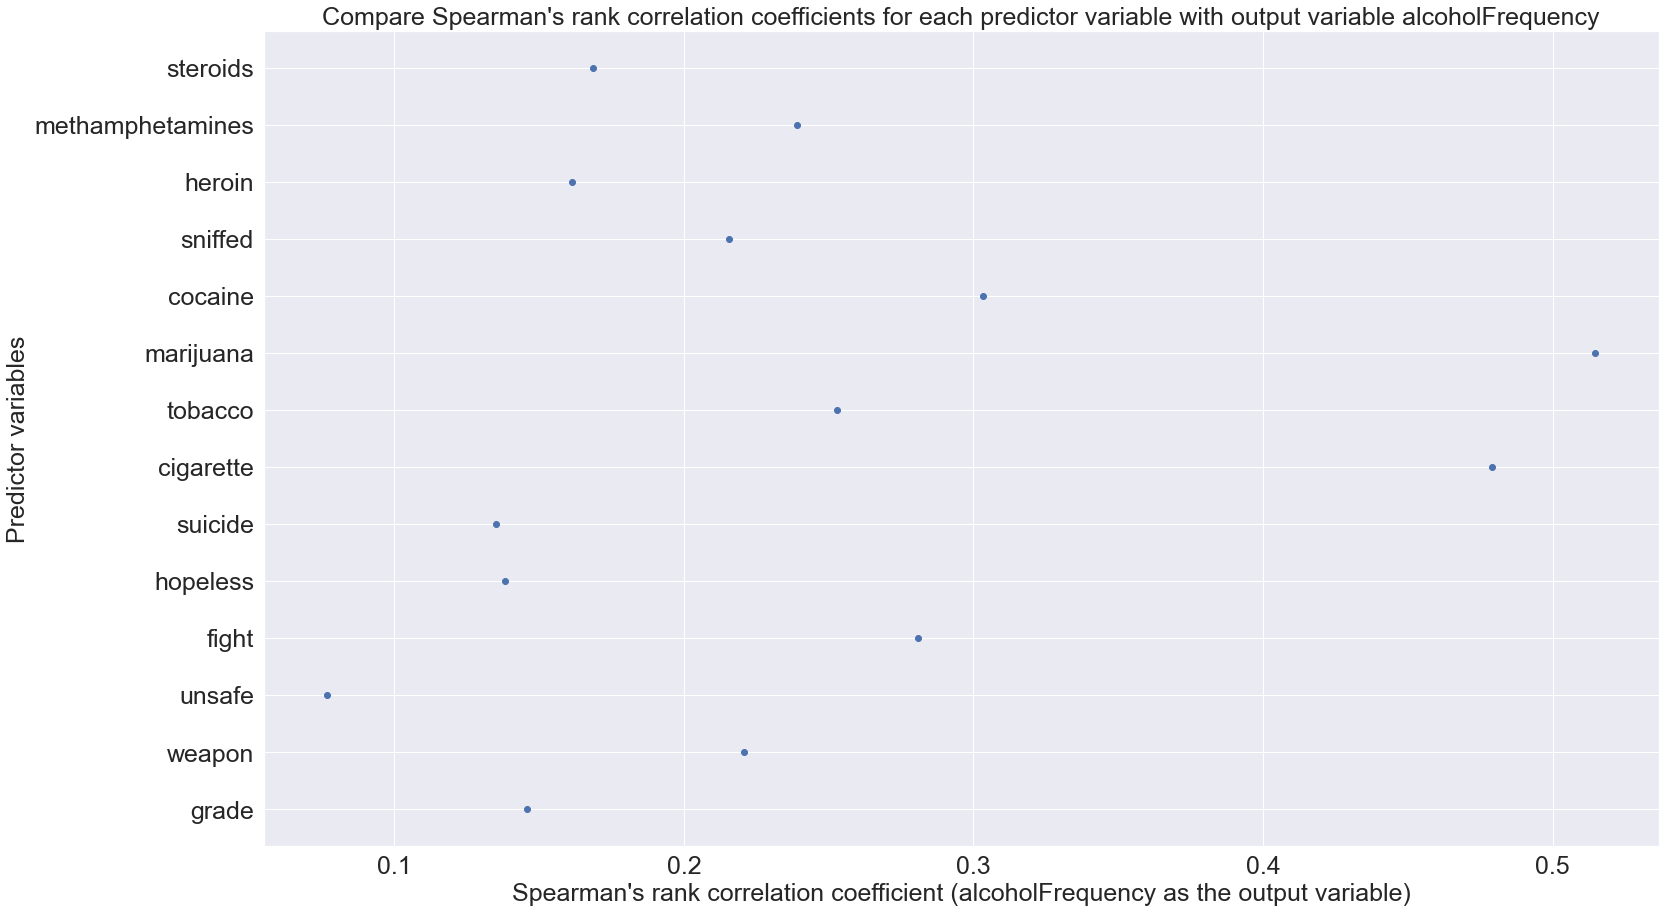

In [33]:
# Exploratory code for scatter matrix
# sns.pairplot(students)

# Exploratory code for Spearman's rank correlation coefficient
data = []
columns = list(unconvertedStudents.columns)[2:-1] # Exclude age, sex, grade level, and year
columns.remove("alcoholFrequency") # Exclude alcohol column

# Compute the Spearman coefficient for all predictor variables against alcoholFrequency
coefficients = []
for name in columns:
    coefficient, pValue = stats.spearmanr(unconvertedStudents[name], unconvertedStudents["alcoholFrequency"])
    coefficients.append(coefficient)

# Plot the coefficients
data.append(coefficients)
ax = plt.plot(coefficients, columns, 'o', label = "alcoholFrequency")

# Label parts of the plot
plt.xlabel("Spearman's rank correlation coefficient (alcoholFrequency as the output variable)")
plt.ylabel("Predictor variables")
plt.title("Compare Spearman's rank correlation coefficients for each predictor variable with output variable alcoholFrequency")
plt.show()

The above plot doesn't take into account time (we draw a different plot that does take into account time below) yet because we first want to get a rough overview on the Spearman's rank correlation coefficients for each variable with alcoholFrequency. All the coefficients for each variable exhibit some positive correlation with alcoholFrequency. Another observation is that "marijuana" and "cigarette" have a much stronger positive coorelation with "alcoholFrequency" than do the other variables, although both coefficients are just around 0.5, which is only moderately positively strong. The other coefficients don't come close to the coefficients of "marijuana" and "cigarette." The coefficient for the relationship between "cocaine" and "alcoholFrequency" could be considered moderately positively strong because it's above 0.3, but it's still too far from the coefficients for "marijuana" and "cigarette." The coefficient for "unsafe" is also the weakest positive coefficient out of every coefficient on the plot, being the only one that's below a correlation coefficient of 0.1. 

This confirms our first hypothesis - all positive coefficients. Our observations go against the rest of our hypotheses, however, because psychological factors (weapon, fight, unsafe, hopeless, and suicidal) don't have the strongest positive correlation with "alcoholFrequency." In fact, we found that one of the psychological variables "unsafe" actually has the weakest coefficient on the plot. In our hypothesis, we also said that students who use less consequential substances ("cigarettes," "tobacco," "marijuana," "chemicals," "sniffing," and "steroids") tend to consume alcohol more frequently, but when comparing those coefficients to the coefficients of more dangerous substances ("cocaine," "heroin," and "methamphetamines"), neither set of substance variables seem to exhibit an overall stronger positive correlation with alcoholFrequency than the other. Overall, no single "subtopic" contains coefficients that are positively stronger than others. It's really just "marijuana" and "cigarette" that have the stronger positive correlations. The rest are far below and around the same values.

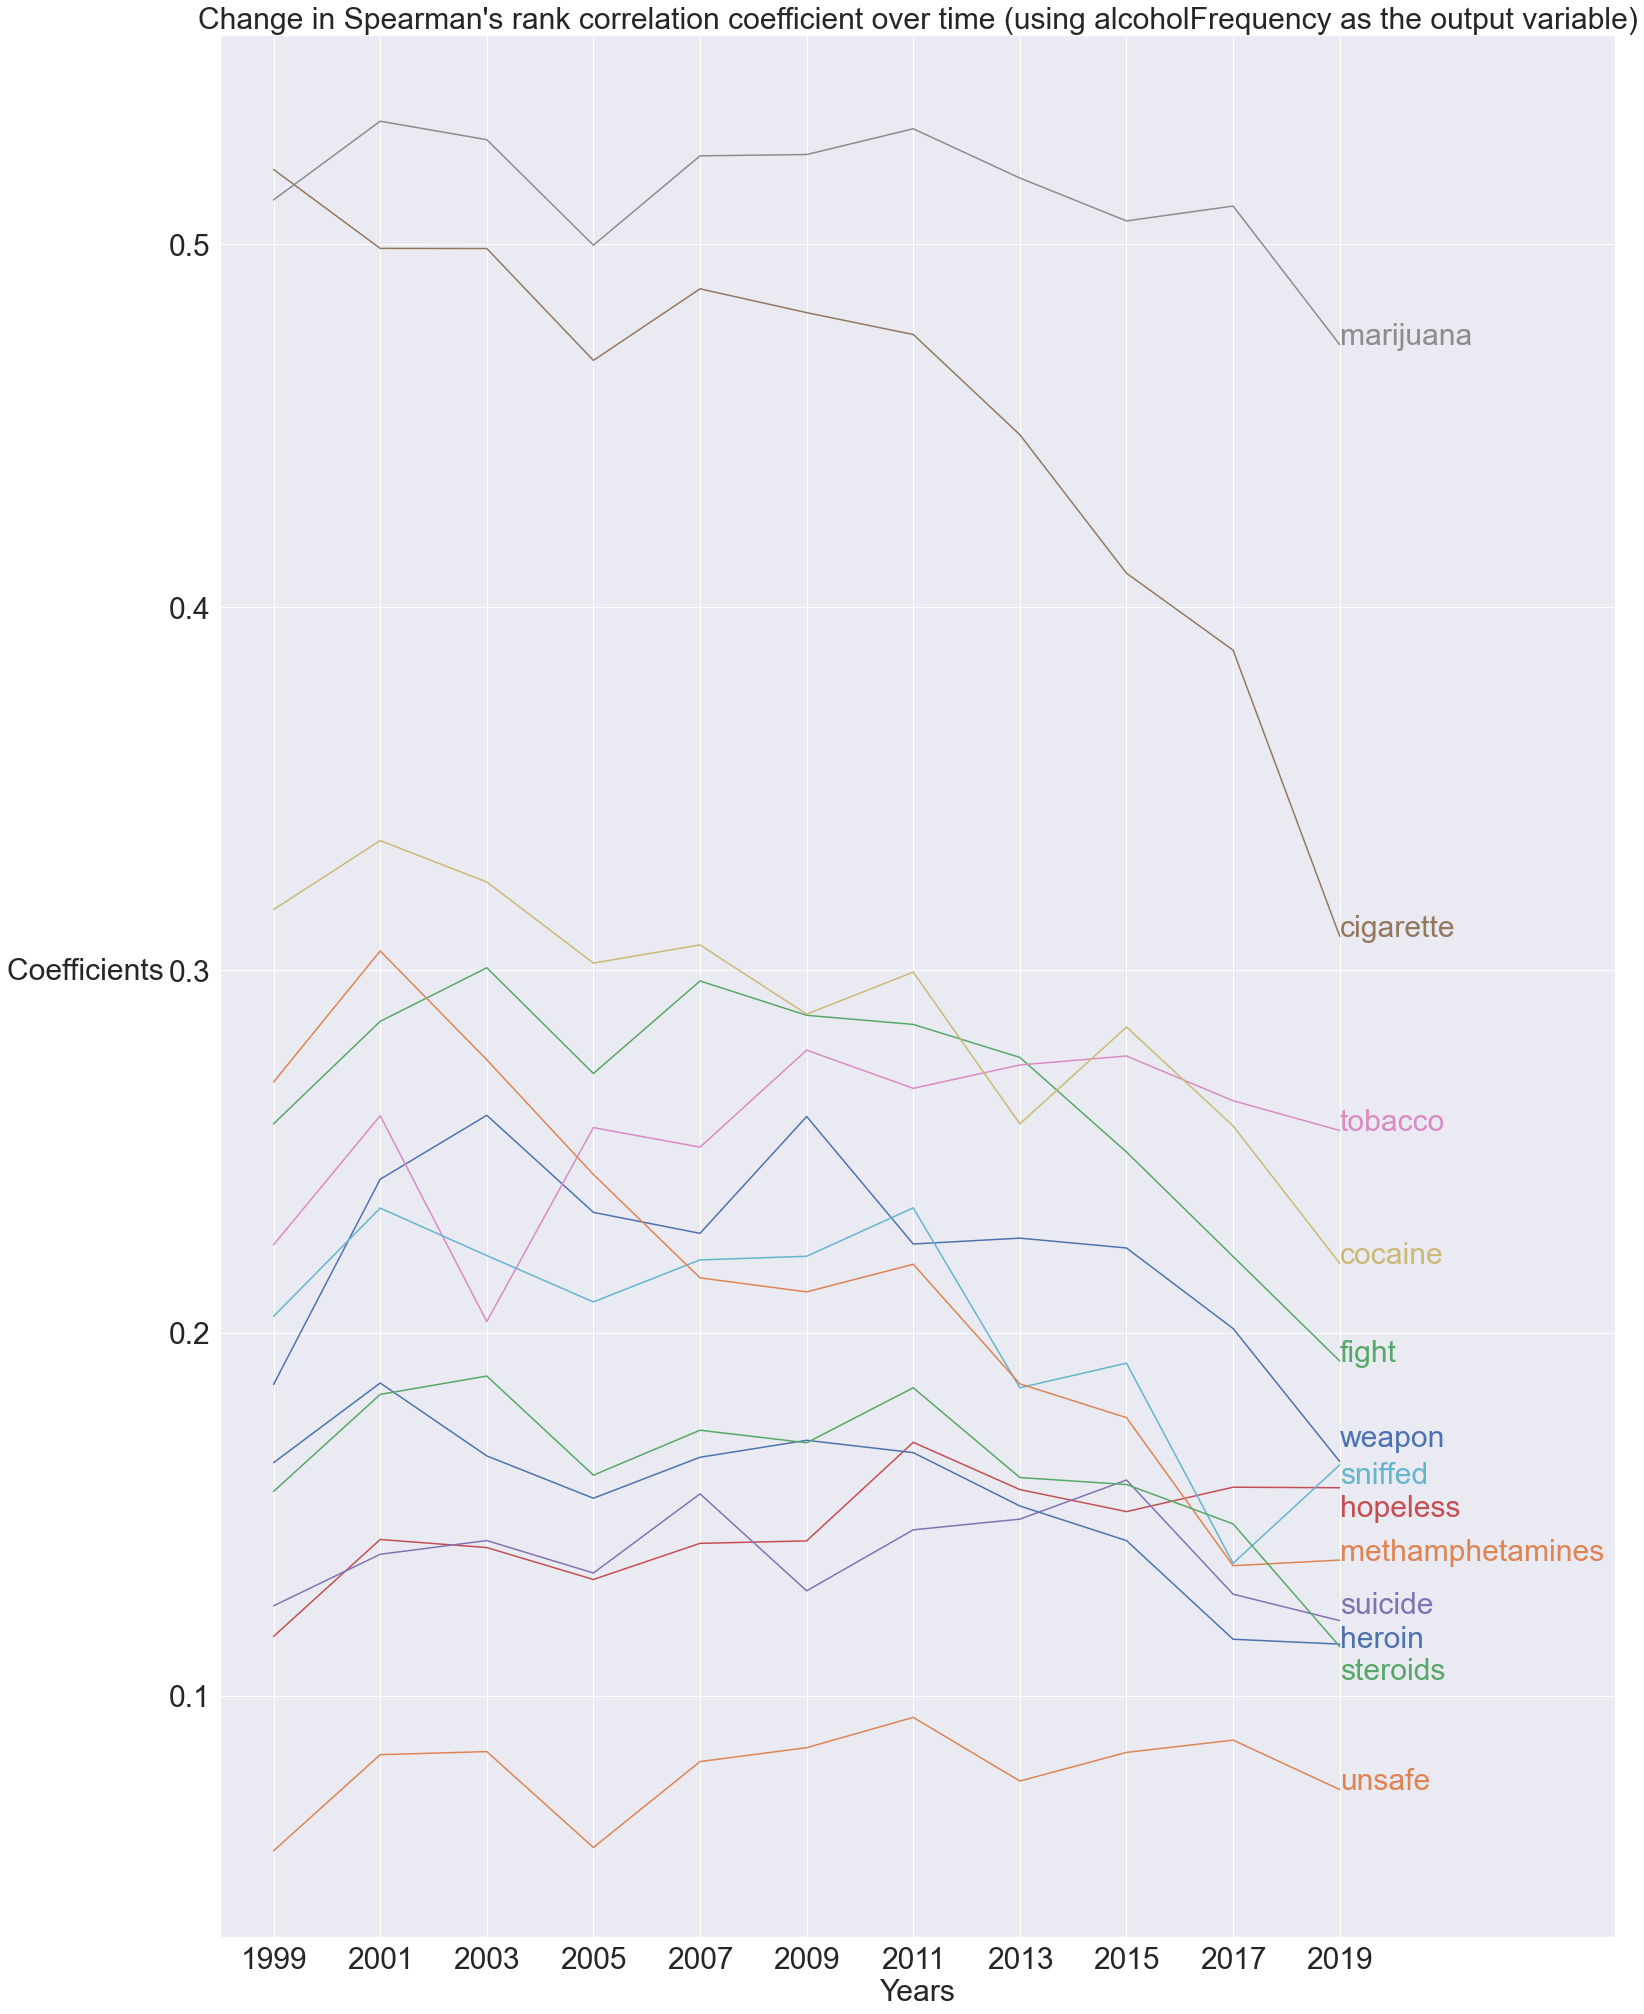

In [34]:
# We want to make a line plot of all Spearman's coefficients over time. The x-axis should be years while the y-axis should be
# be the Spearman's rank correlation coefficient for each predictor variable with the output variable. We want to see the
# change in these Spearman's correlation over time.
# Set up some lists that we will need to compute the desired Spearman's coefficients
coefficients = []
columns = list(unconvertedStudents.columns)[3:-1] # Exclude age, sex, grade level, and year
columns.remove("alcoholFrequency") # Exclude alcohol column

# Make a list of years for the index in our data frame. This is so our x-axis on our plot write down the years
year = 1999
years = []
while(year <= 2019):
    years.append(str(year))
    year += 2

# For each subset of a year, compute the coefficients for each predictor variable with each alcohol output variable
year = 1999
while(year <= 2019):
    tempCoefficients = []
    for name in columns:
        coefficient, pValue = stats.spearmanr(unconvertedStudents[unconvertedStudents["year"] == year][name], unconvertedStudents[unconvertedStudents["year"] == year]["alcoholFrequency"])
        tempCoefficients.append(coefficient)
    year += 2
    coefficients.append(tempCoefficients)

# This plot is different. We need to make it taller so it's easier to see the lines on the plot.
sns.set(rc = {'figure.figsize':(25, 35)})
SIZE = 30
plt.rc('font', size = SIZE)
plt.rc('axes', titlesize = SIZE)
plt.rc('axes', labelsize = SIZE)
plt.rc('xtick', labelsize = SIZE)
plt.rc('ytick', labelsize = SIZE)
plt.rc('legend', fontsize = SIZE) 
plt.rc('figure', titlesize = SIZE)
    
# This plot is a bit different. We need to get the figure for this one
df = pd.DataFrame(data = coefficients, columns = columns, index = years)
xTicks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # This is to get all ticks to display
ax = df.plot.line(legend = None, xticks = xTicks)
fig = plt.gcf()
ax.set_xlabel("Years")
ax.set_ylabel("Coefficients                   ", rotation = 0)
plt.title("Change in Spearman's rank correlation coefficient over time (using alcoholFrequency as the output variable)")

# We tried to calculate the positions of these labels programmatically, but the labels keep stacking on top of each other.
# Make a list of offsets for some values
yOffsets = [0.004, 0, 0, -0.008, 0.002, 0, 0, 0, 0, -0.005, -0.001, 0, -0.009]

# Let's replace the legend with labels on the plot itself
index = 0
for line, column in zip(ax.lines, list(df.columns)):
    # Get data about the lines
    x = line.get_xdata()[-1]
    y = line.get_ydata()[-1]
    
    # Apply offset
    y = y + yOffsets[index]
    
    # Write the label on the plot
    text = ax.annotate(column, xy = (x, y), xytext = (0, 0), color = line.get_color(), xycoords = (ax.get_xaxis_transform(),
                       ax.get_yaxis_transform()), textcoords = "offset points")
    text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 2.2)
    
    index += 1

plt.show()

When we take into account the change in time, we do see some changes in the correlations for some variables over time. The correlation coefficients for "cigarrete" with "alcoholFrequency" greatly decrease in time when compared to the others. The coefficients for "cocaine" and "methamphetamines" do have a slight decrease over time as well, but it's not as big of a drop as the one for "cigarette." The coefficients for "steroids" seem to have a noticeable decrease only starting from 2013. For "sniffed's" coefficient, it only starts to have a noticeable decrease around 2011, but it doesn't decrease steadily like the coefficient for "steroids" does.

Additionally, the coefficients for "marijuana" and "cigarrete" are still the highest coefficients over the years; however, only the coefficient for "cigarrete" drops out of the top two coefficients (about 0.2 in correlation from 1999 to 2019). This puts the coefficient for "cigarette" very close close to 0.3, which is a low enough value to perhaps no longer consider it as moderately strong. That is, we may consider the coefficient for "cigarette" to be fitting in the group of other coefficients below the one for "marijuana."

As for our hypotheses, our conclusions don't change for the early years, but for the years from 2015-2017 onwards, we may consider "marijuana" as the only variable that's strongly positively correlated with "alcoholFrequency." "Cigarette's" coefficient just ends up falling into the motley of other low coefficients.

#### Analysis using Poisson regression models

We'll check for confounding variables by creating a baseline model (a model containing all predictor variables except for age, sex, and grade level), temporarily removing one variable at a time from the baseline model to see how much of an effect they have on other variables.

In [35]:
# Define a function for building models since the only thing we need to change is the formula
def poissonRegression(formula):
    # Warning: you must use the unconvertedStudetns DataFrame because everything must be coded as values
    outcome, predictors = dmatrices(formula, unconvertedStudents, return_type = "dataframe")
    
    # Unlike in class, we are using a Poisson distribution here, so call sm.families.Poisson()
    model = sm.GLM(outcome, predictors, family = sm.families.Poisson()).fit()
    print(model.summary())

In [36]:
# Use this to create the formula we're working with
def createFormula(predictorVariables):
    formula = "alcoholFrequency ~ "
    
    first = True
    for name in predictorVariables:
        # Don't add a "+" on the first run
        if(first == False):
            formula = formula + "+ "
        else:
            first = False
            
        formula = formula + name + " "
    
    return formula

In [37]:
# Make a model that contains all predictor variables. Remove each predictor variable one by one to see how much
# they impact the coefficients
def examineConfounders():
    columns = list(students.columns)
    columns.remove("alcoholFrequency") # Exclude alcoholFrequency because this is our dependent variable

    # See what the model looks like without removing any variables except for age, sex, and grade
    print("Base model")
    formula = createFormula(columns[3:])
    poissonRegression(formula)

    # Use the outer for loop to select columns to temporarily remove one at a time
    print()
    for possibleConfounder in columns[3:]:
        print("Checking the model if " + possibleConfounder + " is removed.")
        testPredictors = columns[3:].copy()
        testPredictors.remove(possibleConfounder) 

        # Now check what happens when we introduce year into each of the models
        formula = createFormula(testPredictors)
        poissonRegression(formula)
        print()

    # Now temporarily add age, sex, and grade level one at a time to see if they have much of an effect.
    for possibleConfounder in columns[:3]:
        print("Checking the model if " + possibleConfounder + " is added.")
        testPredictors = columns[3:].copy()
        testPredictors.append(possibleConfounder) 

        # Now check what happens when we introduce year into each of the models
        formula = createFormula(testPredictors)
        poissonRegression(formula)
        print()
        
# For the purpose of the final project, don't uncomment this. Only uncomment this to help us with
# finding confounding variables
# examineConfounders()

The output from the above code will be excluded for the purpose of this project because it generates a ton of models. Instead, we'll explain our findings in the next few Markdown cells. Firstly, we should get an overview of what the coefficients look like in the baseline model, which includes all predictor variables except for "age," "sex," and "grade." It turns out that there are quite a lot of confounding relationships in our model, so we'll expose them one by one below. Normally when finding confounding variables in regression models, the threshold for determining a confounding variable is a 10% change to other coefficients after removing a variable. We found that to be too low for our analyses, but a 40% threshold worked a lot better. Also, in the context of p-values, we will define our alpha value to be α = 0.01. To briefly mention, we did introduce age, sex, and grade level individually to the model, and none of them changed the coefficients much. 

Below is our baseline model that contains all predictor variables except for age, sex, and grade level.

In [38]:
# Make a model that takes into account all predictor variables
poissonRegression("alcoholFrequency ~ weapon + unsafe + fight + hopeless + suicide + " + 
                  "cigarette + tobacco + marijuana + cocaine + sniffed + heroin + " + 
                  "methamphetamines + steroids + year")

                 Generalized Linear Model Regression Results                  
Dep. Variable:       alcoholFrequency   No. Observations:               122762
Model:                            GLM   Df Residuals:                   122747
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6975e+05
Date:                Sun, 14 Mar 2021   Deviance:                       49666.
Time:                        23:42:21   Pearson chi2:                 5.75e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           18.3698      0.730  

This is rather interesting to see. Predictor variable "marijuana" is the only variable that stands out from the rest, having a coefficient of 0.0949, which is nearly double the second largest coefficient of 0.0585 for "tobacco." Additionally, without removing any variables yet, this model doesn't show things that are that much different from our observations on the Spearman's coefficients. In that plot, we found that "cigarette's" correlation gets weaker as we approach 2019 while "marijuana" stays roughly the same - it remains as the only variable that's moderately positively correlated with "alcoholFrequency." In our baseline Poisson regression model, "cigarette" falls down to a coefficient similar to that of the other variables, which are grouped together in the manner we saw in the Spearman's coefficients plot above.

We, however, don't want to compare these observations to our hypotheses yet because as mentioned above, there are a lot of confounding relationships, even though it may not appear so based on the coefficients and p-values shown in the model. The biggest one we found is the link between "hopeless" and "suicide," so we'll recreate a model without "suicide."

In [39]:
# Remove "suicide" from the model
poissonRegression("alcoholFrequency ~ weapon + unsafe + fight + hopeless + cigarette + " +
                  "tobacco + marijuana + cocaine + sniffed + heroin + methamphetamines + " +
                  "steroids + year")

                 Generalized Linear Model Regression Results                  
Dep. Variable:       alcoholFrequency   No. Observations:               122762
Model:                            GLM   Df Residuals:                   122748
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6976e+05
Date:                Sun, 14 Mar 2021   Deviance:                       49675.
Time:                        23:42:21   Pearson chi2:                 5.75e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           18.3497      0.730  

Removing "suicide" makes little impact on all the other predictor variables, but removing "hopeless" only changes the coefficient for "suicide" from 0.01893 to 0.04400. Thus, we think there is a confounding relationship between these two variables and should remove "suicide." Next, we will remove a few substance variables from the model: "unsafe," "cigarette," "sniffed," "heroin," and "methamphetamines."

In [40]:
# Remove "unsafe," "cigarette," "sniffed," "heroin," and "methamphetamines."
poissonRegression("alcoholFrequency ~ weapon + fight + hopeless + tobacco + marijuana + " +
                  "cocaine + steroids + year")

                 Generalized Linear Model Regression Results                  
Dep. Variable:       alcoholFrequency   No. Observations:               122762
Model:                            GLM   Df Residuals:                   122753
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7074e+05
Date:                Sun, 14 Mar 2021   Deviance:                       51637.
Time:                        23:42:22   Pearson chi2:                 5.99e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3950      0.712     34.242      0.0

During our mini EDA in the `examineConfounders()` function, we found that the removal of "marijuana" changed each of the coefficients of "unsafe," "cigarette," "sniffed," "heroin," and "methamphetamines" by more than 40% of their original value in the baseline model. Subsequently, removing those 5 variables once again didn't have a noticeable change on the other coefficients, except for "heroin." Unexpectedly, in the baseline model, removing "heroin" changed the coefficient of "steroids" by more than 40%, and removing "steroids" still changed the coefficient of "heroin" by more than 20%, which is a rather strange effect.

Coming back to our most recent model above, this is probably explained by the p-value of 0.186 for "steroids," which is considerably greater than our α value of 0.01. This evinces evidence that there is no statistically significant relation between "steroids" and "alcoholFrequency"; therefore, we think it's best to remove "steroids" from the model.

In [41]:
# Remove "steroids" to create our final model without confounding variables.
poissonRegression("alcoholFrequency ~ weapon + fight + hopeless + tobacco + marijuana + cocaine + year")

                 Generalized Linear Model Regression Results                  
Dep. Variable:       alcoholFrequency   No. Observations:               122762
Model:                            GLM   Df Residuals:                   122754
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7074e+05
Date:                Sun, 14 Mar 2021   Deviance:                       51638.
Time:                        23:42:23   Pearson chi2:                 5.99e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3783      0.712     34.222      0.0

At last, we reach the final model for our results section. What we see in this model goes a bit against what we found in the Spearman's coefficients plot, mainly because it couldn't detect confounding variables. We'll rank the coefficients below from highest to lowest.  

1) marijuana: 0.1156  
2) hopeless and tobacco: 0.0723 and 0.0709  
3) cocaine: 0.0488  
4) fight and weapon: 0.0373 and 0.0346  
5) year: -0.0122  
  
As per the final model, we note the following observations below to answer our reserach question.   
- For reference, the question that corresponds to "alcoholFrequency" is "during the past 30 days, on how many days did you have at least one drink of alcohol?" The answer choices and their decoded labels are as follows.
    - λ = 1: 0 days (ln(λ) = 0)
    - λ = 2: 1 or 2 days (ln(λ) ≈ 0.6931)
    - λ = 3: 3 to 5 days (ln(λ) ≈ 1.0986)
    - λ = 4: 6 to 9 days (ln(λ) ≈ 1.3863)
    - λ = 5: 10 to 19 days (ln(λ) ≈ 1.6094)
    - λ = 6: 20 to 29 days (ln(λ) ≈ 1.7918)
    - λ = 7: 30 days (ln(λ) ≈ 1.9459)
- The p-values corresponding to all predictor variables are less than our α value of 0.01, which means all these variables have statistically significant relationships with "alcoholFrequency."
- The coefficient for "marijuana" still is the largest coefficient out of the remaining predictor variables; however, it's coefficient is no longer considerably higher than all other variables like it was in the Spearman's coefficient plot. 
    - A coefficient of 0.1156 for example would mean that as we move up one response category for "marijuana's" question, we would expect log-alcoholFrequency (ln(λ)) to increase by about 0.1156.
    - The low value of 0.1156 may be a bit decieving. To put into perspective the magnitude of this coefficient, we will interpret it further. To briefly reiterate, "marijuana's" question takes answer choices 1 through 7 in unconvertedStudents (decoded as "0 times" to "100 or more times"). Suppose we hold every input variable except for "marijuana" constant. This means if we increase the value of "marijuana's" input from 1 to 7, it will increase log-alcoholFrequency (ln(λ)) by 6 * 0.1156 ≈ 0.6936, which is a moderately large positive change. It can increase the output of alcoholFrequency (λ) up by at most 3 categories. 
    - The coefficients for the variables other than "marijuana" are no longer tightly clumped together far below the coefficient for "marijuana" itself. They now seem spread out pretty well.
- The coefficients for "tobacco" and "hopeless" indicate that they have a moderately strong positive relationship with "alcoholFrequency;" they are now the second highest set of coefficients.
- The coefficient for "cocaine" is the next highest coefficient.
- "Weapon" and "fight" exhibit a rather weak coefficient with "alcoholFrequency."
- Time does play a relatively small role in our model, although it shouldn't be considered inconsequential. A coefficient of -0.0122 for "year" may not seem like much, but our year values range from 1991 - 2019, which is a rather big range of values compared to the at most 7 answer choices in the survey.
    - If the year is 1991, it would produce a value of 1991 * (-0.0122), which is about -24.29, although our incercept is 24.3793, which will mostly mitigate the effects of this low value.
    - A year of 2019, however, would produce a value that is 0.34 lower than the one for 1991 (-24.63). This can sometimes be enough to cause the log-alcoholFrequency value (ln(λ)) to drop far enough such that alcoholFrequency (λ) could output one lower category. That is, alcoholdFrequency (λ) could output a category below what 1991 would have caused it to output. Seeing the full impact of 0.34 would be a rather slow process because of the time gap between 1991 and 2019, though.  
- Overall, quite a lot of the variables in our dataset have spurious correlations. We will list the variables removed below:
    - "suicide" (affected by "hopeless")
    - "unsafe" (affected by "marijuana")
    - "cigarette" (affected by "marijuana")
    - "sniffed" (affected by "marijuana")
    - "heroin" (affected by "marijuana")
    - "methamphetamines" (affected by "marijuana")
    - "steroids" (both "heroin" and "steroids" affect each other)

#### Revisiting the hypotheses
How do these observations compare to our hypotheses for high school students in the United States? Once again, our hypotheses are still far off from our observations. For convenience, we'll paste parts of our hypotheses down here are compare them with our observations. 

Hypothesis 1: "we hypothesize that all these health-risk behaviors and factors will exhibit some sort of positive correlation with frequent alcohol consumption."
- This is the only part of our hypothesis that is supported by our observations. Even before removing the predictor variables that are affected by confounding relationships, they all still exhibit a positive coefficient with "alcoholFrequency."
- That isn't to say that we didn't have a new negative coefficient, though. We also found out that time (in terms of years) is still a factor for a decrease in frequency of alcohol consumption by high school students, although a very slow one.   

Hypothesis 2: "we think that psychological factors (including the need to arm themselves with weapons and engage in fights) such as feeling unsafe at school, hopeless, and suicidal will have the strongest relationship to frequent alcohol consumption."
- Based on our model, psychological factors for high school students aren't the strongest factors that relate to frequent alcohol consumption. It's those who use marijuana that tend to drink more alcohol.
- Feeling hopeless, however, is still a relatively strong psychological factor for consuming alcohol given our model's results.

Hypothesis 3: "we also hypothesize that high school students who use less consequential substances such as cigarettes, tobacco, marijuana, chemicals (sniffing spray paint cans, glue, markers, etc.), and steroids will tend to drink more alcohol than those who use the more dangerous substances."
- Before removing variables in our model, this isn't exactly true because the coefficient for "marijuana" is the only substance out of all less consequential substances to stand out, but after pruning variables from our model, we do have a bit more evidience to support our hypothesis. "Marijuana" and "tobacco" (both less consequential substances) do have a higher coefficient than that of "cocaine's" coefficient (more dangerous substance), although it's a lot less variables than what we originally anticipated that we would use.  

## Ethics & Privacy

To start off this section, we should list the qualms we had about handling ethics and privacy. There are quite a few ethical and privacy concerns when conducting research on high school students. Some students may not be comfortable with giving as much information as we desire, especially information regarding their personal factors, substance use, etc. In order to remedy these privacy concerns, we found data from surveys, which most likely contain data that have been consented to (we will elaborate on all this stuff below). Additionally, we tried to potentially mitigate these concerns further by using public data, especially one from a well respected institution like CDC which does follow ethical guidelines, and data that excludes any student identification components. Furthermore, the usage of public data will help remove the need to encrypt and consider secure storage on our part. Regarding these concerms, we were able to find some information on how CDC handles it below.

- The following survey procedure comes from the 1991 - 1997 manuals: "survey procedures were designed to protect student privacy and allow for anonymous participation. The [number of questions]-item questionnaire was administered in the classroom by trained data collectors... Parental consent was obtained prior to survey administration [1]."
- This next procedure comes from the 1999 - 2003 manuals: "survey procedures were designed to protect the students’ privacy by allowing for anonymous and voluntary participation... Local parental permission procedures are followed before survey administration [1]." 
- Unfortunately there isn't anything about privacy mentioned in the 2005 - 2019 manuals, so we'll just have to look at CDC's website to see how they deal with privacy.
    - CDC says that they will conform to federal laws regarding personal information, and they explicitly said it will not be in any way disclosed publically or given away (it's also not disclosed in the datasets) [2].
    - They will also only collect personal information if the respondant chooses to do so, and the personal information is just used to contact individuals.

Regarding any biases in our data, even after finding this dataset, there still isn't much of a way to correct for this on our end. Given that we used data from survey responses, there is a good chance that students may skew their responses. Finding data that have been collected from anonymous responses, however, may have helped alleviate this issue - students will be less inclined to misrepresent themselves in their responses. We were also concerned about bias in the data entries themselves. This indeed was an issue in our project because we had quite a lot of missing data. The way we handled this is by simply pruning all the missing information.

There is a second issue for bias is in terms of misrepresenting certain types of students (type of school they went to, ethnicity, etc.), but we think CDC covered this pretty well for our project. In all manuals, they described that each survey is employed nationally with three-stage cluster sampling to evenly cover the population of 9th-12th grade students (this is also indicated in our EDA) [1]. We're not going to go into detail what they did, but we'll summarize what they tended to focus on. They considered many types of counties ("large counties, sub-areas of very large counties, or groups of small, adjacent counties"), used weighting to make sure they account for nonresponse and potential oversampling of students such as black and Hispanic students, and evenly sampled both public and private schools. Unfortunately, Catholic schools were not considered in the sampling procedure until 2005, but we believe that what CDC has done is still fairly good for the purpose of mitigating bais in our datasets. 

We also need to consider the stakeholders and how they may be affected, which include parents, students, friends, schools, and possibly even the states involved. The most important one to consider are the students themselves. If it turns out that we find compelling relationships for certain sensitive factors (such as substance usage for example) with alcohol consumptions, our findings may not be appealing to them and could contribute to increased negative effects for these individuals if the are to view our analyses. Students that are associated with factors that positively correlate with alcohol consumption may also be treated with bias from peers, educational institutions, or law enforcements. Like some other projects, our project only investigates relationships between those factors and frequency of alcohol consumption, which generally isn’t enough to prove causation from a statistical standpoint. However, there is a risk that stakeholders such as the public, institutions, etc. may misinterpret our findings as causes of illegal drinking for minors. Moreover, in some extreme cases, there may be the possibility of some misunderstanding of our data, which could end up causing misconceptions that influence institutions/policy makers.

References:
- 1) Manuals from this link: https://www.cdc.gov/healthyyouth/data/yrbs/data.htm
- 2) https://www.cdc.gov/other/privacy.html

# Conclusion & Discussion
Unfortunately, our observations are far different from what we hypothesized. The only part of our observation that's compatible with our hypotheses is the fact that all predictor variable coefficients, on both the Speraman's rank correlation coefficient plot and the Poisson regression models, show a positive correlation with increased frequency of alcohol consumption by high school students in the United States. Unexpectedly, we also came across another variable that would influence our analyses: a time variable. We found that our time variable "year" is the only variable to exhibit a negative coefficient with "alcoholFrequency," which suggests that the population of high school students tends to drink alcohol less frequently over the years.

We had two other hypotheses as well, one is that students with psychological factors would have the highest tendency to drink frequently, while the other is that students who use less consequential substances tend to drink alcohol more frequently than do students who use more dangerous substances. For our Spearman's coefficient plot, none of the coefficients for these behaviors or factors stood out from the other (as in they're all grouped together in the range of 0.0 to 0.3) except for the coefficients for "marijuana" and "cigarette," which have coefficients of around 0.5; however, we see that the coefficient for "cigarette" drastically decreases over time, bringing it down to about 0.3, which fits in with the cluster of the other predictor variable coefficients. Thus, for the more recent years, only the relationship between "marijuana" and "alcoholFrequency" stands out above the rest.

Our analyses did change a bit when we moved to Poisson regression, though. There are a copious amount of spurious correlations. "Suicide" is affected by "hopeless." "Unsafe," "cigarette," "sniffed," "heroin," and "methamphetamines" are all affected by "marijuana." The last spurious correlation is strange: both "steroids" and "heroin" impact each other. Nevetheless, our observations became much more meaningful when we removed those variables because the coefficients for the remaining variables are now spread out evenly. We will rank the coefficient values for each variable here (we'll use ≈ to denote that two variable's coefficients are roughly equal): "marijuana" > "tobacco" ≈ "hopeless" > "cocaine" > "fight" ≈ "weapon" > "year" (only negative coefficient again). As expected, students who use "marijuana" still have to strongest tendency to drink more alcohol. These observations still refute our hypothesis that psychological factors would be the strongest factor for frequent alcohol consumption. In fact, those psychological factor variables tend to have lower coefficients with "alcoholFrequency." We found that these observations from the Poisson regression models do somewhat support our other two hypotheses, however. The coefficients of the two remaining less consequential substances - "marijuana" and "tobacco" - are still greater than that of the coefficient for the only remaining dangerous substance "cocaine."

Aside from the observations, there are also a few limitations we encountered for our project. The first and the most noticeable one is the inconsistent questions and answers in the surveys used for our the datasets. We had to drop a few columns in our datasets because they had at least one of the following issues: drastically different question wordings, missing question in some datasets, and inconsistent answer choices. The questions are ordered differently too, but it didn't impede us from getting the data from the questions we want. Additionally, we couldn't use the datasets from 1991 - 1997 because many of the questions we're using are missing from those datasets. The second limitation is the varying types of categorical variables we got. Some of them are binary questions, but most of the other questions invovled vastly different count variables. In particular, we got questions that specified number of days or number of times a student did something over their lifetime, over 12 months, and over 30 days. Luckily, this is mostly mitigated by  Poisson regression's ability to take mixed predictor variable types, but there isn't much of a way to take those into account in other parts of our analyses.

# Team Contributions
We met frequently throughout the quarter, specifically once or twice every week to discuss the parts of the project we worked on for at least 1-2 hours. In the beginning of the quarter, all of us serached for datasets and took part in the data cleaning process. For the EDA, Brian and Lian worked on the code for plots while Dillen and Allen worked on writing the interpretations for each of them, although Allen had to help out a bit with the coding section. Finally, for the results section, we maintained those same roles, although all of us had to do some extensive research on the Poisson regression model. As for the other writing sections in this notebook, Lian covered the ethics and privacy section, Dillen and Brian covered the background and prior work section, and Allen covered the conclusion.